## Phase 3 (Data Preparation)

Datan esikäsittelyvaiheessa on tarkoitus käsitellä ja valmistella data sellaiseen kuntoon, että sitä voidaan käyttää helposti mallinnusvaiheessa ilman merkittäviä lisämuokkauksia.   
   
Vaiheessa keskitytyään esimerkiksi tietojen: 
- Puhdistamiseen 
- Muokkaamiseen 
- Valitsemiseen   

- Lopuksi data skaalataan ja/tai normalisoidaan. 

Vaiheessa on paljon tekemistä, mutta sen onnistuminen on tärkeä myös koko projektin onnistumisen kannalta. Datan esikäsittelyvaiheeseen saatetaan joutua palaamaan takaisin vielä myöhemmässä vaiheessa projektia. 


## Sisällysluettelo

1. [Datan lataaminen](#datan-lataaminen)
2. [Sarakkeiden poistoja](#sarakkeiden-poistoja)
3. [Datatyyppien muutoksia](#datatyyppien-muutoksia)
4. [Kategoriset sarakkeet](#kategoriset-sarakkeet)
5. [NaN-arvojen käsittely](#nan-arvojen-kasittely)
6. [One-Hot Encoding](#one-hot-encoding)
7. [Outliers](#poikkeavien-arvojen-tunnistaminen-outliers)
8. [Datan visualisointeja](#datan-visualisointeja)
9. [Boolean-sarakkeet int:ksi](#boolean-sarakkeet-intksi)
10. [Datan skaalaaminen](#datan-skaalaaminen)


### Tästä lähtee datan esikäsittelyvaiheen toteutus

<a id="datan-lataaminen"></a>
## Datan lataaminen

- Ladataan esikäsittelemätön data

'''#import kaggle
#import zipfile
import pandas as pd
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

file_path = r"C:\Lataukset\used_cars\used_cars_data.csv"

# Get the total number of rows
total_rows = sum(1 for _ in open(file_path, encoding='ISO-8859-1'))  # Count rows for progress

# Create an empty dataframe to accumulate chunks
dataframe = pd.DataFrame()


# Read in chunks and display a progress bar
#Poista nrows=1000000 jos haluat ladata kaikki rivit
chunk_size = 10000
for chunk in tqdm(pd.read_csv(file_path, nrows=1000000, chunksize=chunk_size), total=total_rows // chunk_size, desc="Loading CSV"):
    dataframe = pd.concat([dataframe, chunk])


print("Data loaded successfully.")'''

In [1]:
import pandas as pd
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')


#file_path = r"C:\Users\Omistaja\Desktop\AI_DA-projekti1\aida-projekti-syksy-2024-ryhma-1\docs\us_used_cars\used_cars_data.csv"
file_path = r"E:\Koulujutut\AIDA_projekti\aida-projekti-syksy-2024-ryhma-1\docs\us_used_cars\used_cars_data.csv"
dataframe = pd.read_csv(file_path, nrows=100000)


## Sarakkeiden poistoja:

- Poistetaan sarakkeita, joilla ei katsota olevan arvoa lopputuloksen kannalta
- Poistetaan sarakkeet, joissa liikaa NaN-arvoja, niiden korvaaminen muulla tavalla vääristäisi dataa
- Poistetaan toinen sellaisista sarakkeista, jotka sisältävät saman tiedon

In [2]:

# Näillä sarakkeilla ei katsota olevan arvoa lopputuloksen kannalta
dataframe.drop(columns=[
    'vin',
    'description',
    'listing_id',
    'main_picture_url',
    'bed',
    'bed_height',
    'bed_length',
    'cabin',
    'combine_fuel_economy',
    'is_certified',
    'is_cpo',
    'is_oemcpo',
    'latitude',
    'longitude',
    'vehicle_damage_category',
    'engine_type',
    'engine_cylinders'
    ],axis=1,inplace=True)

#`trim_name` ja `trimId` sisältävät samaa tietoa, joten pudotetaan `trimId`-sarake.
# `wheel_system` ja `wheel_system_display` sisältävät saman tiedon, joten poistetaan `wheel_system`.
dataframe.drop(columns=[
    'trimId', 
    'wheel_system'
    ],axis=1, inplace=True)

dataframe.info()
dataframe.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 47 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   back_legroom          95046 non-null   object 
 1   body_type             99599 non-null   object 
 2   city                  100000 non-null  object 
 3   city_fuel_economy     83984 non-null   float64
 4   daysonmarket          100000 non-null  int64  
 5   dealer_zip            100000 non-null  int64  
 6   engine_displacement   94661 non-null   float64
 7   exterior_color        98607 non-null   object 
 8   fleet                 56925 non-null   object 
 9   frame_damaged         56925 non-null   object 
 10  franchise_dealer      100000 non-null  bool   
 11  franchise_make        74584 non-null   object 
 12  front_legroom         95046 non-null   object 
 13  fuel_tank_volume      95046 non-null   object 
 14  fuel_type             97541 non-null   object 
 15  h

,back_legroom,body_type,city,city_fuel_economy,daysonmarket,dealer_zip,engine_displacement,exterior_color,fleet,frame_damaged,...,sp_name,theft_title,torque,transmission,transmission_display,trim_name,wheel_system_display,wheelbase,width,year
0,35.1 in,SUV / Crossover,Bayamon,NaN,522,960,1300.0,Solar Yellow,NaN,NaN,...,Flagship Chrysler,NaN,"200 lb-ft @ 1,750 RPM",A,9-Speed Automatic Overdrive,Latitude FWD,Front-Wheel Drive,101.2 in,79.6 in,2019
1,38.1 in,SUV / Crossover,San Juan,NaN,207,922,2000.0,Narvik Black,NaN,NaN,...,Land Rover San Juan,NaN,"269 lb-ft @ 1,400 RPM",A,9-Speed Automatic Overdrive,S AWD,All-Wheel Drive,107.9 in,85.6 in,2020
2,35.4 in,Sedan,Guaynabo,17.0,1233,969,2500.0,NaN,False,False,...,FIAT de San Juan,False,"290 lb-ft @ 4,000 RPM",M,6-Speed Manual,Base,All-Wheel Drive,104.3 in,78.9 in,2016
3,37.6 in,SUV / Crossover,San Juan,NaN,196,922,3000.0,Eiger Gray,NaN,NaN,...,Land Rover San Juan,NaN,"332 lb-ft @ 3,500 RPM",A,8-Speed Automatic Overdrive,V6 HSE AWD,All-Wheel Drive,115 in,87.4 in,2020
4,38.1 in,SUV / Crossover,San Juan,NaN,137,922,2000.0,Narvik Black,NaN,NaN,...,Land Rover San Juan,NaN,"269 lb-ft @ 1,400 RPM",A,9-Speed Automatic Overdrive,S AWD,All-Wheel Drive,107.9 in,85.6 in,2020


### Tietotyyppien jakauman havainnollistaminen pylväs- ja piirakkakaavioina

- Pyrkimys päästä eroon objekti-tyyppisestä datasta, koska mallintamisvaiheessa datan tulee olla numeerista
- Eroon objekteista päästään mm. tietotyyppien muunnoksilla ja osittain sarakkeiden/rivien poistoilla

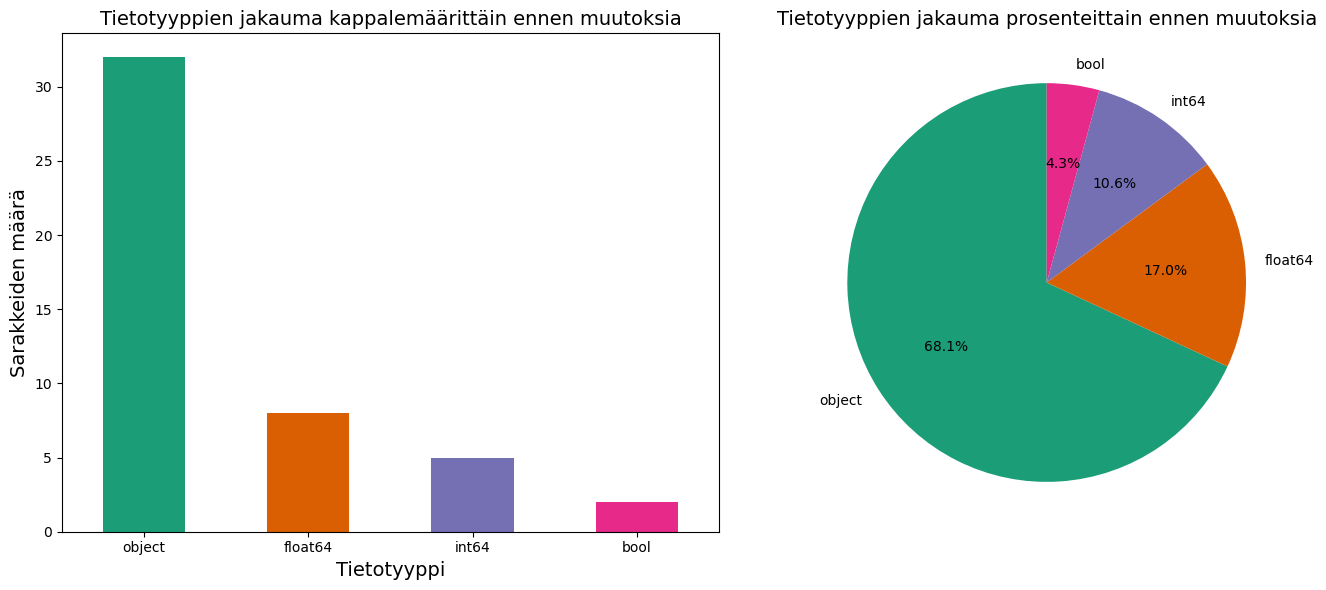

In [3]:
import matplotlib.pyplot as plt
from matplotlib import cm

data_types_plot1 = dataframe.dtypes.value_counts()
colors = cm.Dark2.colors

fig, axes = plt.subplots(1, 2, figsize=(14,6))

# Barplot
data_types_plot1.plot(
    kind="bar",
    ax=axes[0],
    color=colors
)

axes[0].tick_params(axis="x", rotation=0)
axes[0].set_title("Tietotyyppien jakauma kappalemäärittäin ennen muutoksia", fontsize=14)
axes[0].set_xlabel("Tietotyyppi", fontsize=14)
axes[0].set_ylabel("Sarakkeiden määrä", fontsize=14)

# Pie
data_types_plot1.plot(
    kind="pie",
    ax=axes[1],
    autopct="%1.1f%%",
    startangle=90,
    ylabel="",
    colors=colors
)

axes[1].set_title("Tietotyyppien jakauma prosenteittain ennen muutoksia", fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()

## Datatyyppien muutoksia:

- Muutetaan objekti-tyyppiset sarakkeet numeeriseksi ja booleaniksi kun mahdollista
- Päivämäärän käsittely
- Sarakkeiden "power" ja "torque" jakaminen kahteen sarakkeeseen, sillä sisältävät kaksi arvoa

In [4]:
# Preprosessataan nämä objekti-kolumnit numeriseksi:

# back_legroom numeriseksi
dataframe['back_legroom'] = dataframe['back_legroom'].astype(str).apply(lambda x: x.split()[0])
dataframe['back_legroom'] = pd.to_numeric(dataframe['back_legroom'], errors='coerce')

# dealer_zip numeriseksi
dataframe['dealer_zip'] = pd.to_numeric(dataframe['dealer_zip'], errors='coerce')
#print(dataframe['dealer_zip'].dtype) - float64

# front_legroom numeriseksi
dataframe['front_legroom'] = dataframe['front_legroom'].astype(str).apply(lambda x: x.split()[0])
dataframe['front_legroom'] = pd.to_numeric(dataframe['front_legroom'], errors='coerce')

# fuel_tank_volume numeriseksi
dataframe['fuel_tank_volume'] = dataframe['fuel_tank_volume'].astype(str).apply(lambda x: x.split()[0])
dataframe['fuel_tank_volume'] = pd.to_numeric(dataframe['fuel_tank_volume'], errors='coerce')

# height numeriseksi
dataframe['height'] = dataframe['height'].astype(str).apply(lambda x: x.split()[0])
dataframe['height'] = pd.to_numeric(dataframe['height'], errors='coerce')

# lenght numeriseksi
dataframe['length'] = dataframe['length'].astype(str).apply(lambda x: x.split()[0])
dataframe['length'] = pd.to_numeric(dataframe['length'], errors='coerce')

# maximum_seating numeriseksi
dataframe['maximum_seating'] = dataframe['maximum_seating'].astype(str).apply(lambda x: x.split()[0])
dataframe['maximum_seating'] = pd.to_numeric(dataframe['maximum_seating'], errors='coerce')

# wheelbase numeriseksi
dataframe['wheelbase'] = dataframe['wheelbase'].astype(str).apply(lambda x: x.split()[0])
dataframe['wheelbase'] = pd.to_numeric(dataframe['wheelbase'], errors='coerce')

# width numeriseksi
dataframe['width'] = dataframe['width'].astype(str).apply(lambda x: x.split()[0])
dataframe['width'] = pd.to_numeric(dataframe['width'], errors='coerce')




In [5]:
df_copy = dataframe.copy()

# Fill NaN values with 'False' 
df_copy['fleet'] = df_copy['fleet'].fillna('False') 

# Convert the column to boolean type 
df_copy['fleet'] = df_copy['fleet'].astype(bool) 

# Count the number of True and False values in the 'fleet' column
true_count_fleet = df_copy['fleet'].value_counts().get(True, 0)
false_count_fleet = df_copy['fleet'].value_counts().get(False, 0)
null_count = df_copy['fleet'].isna().sum()
# Create a new DataFrame with the counts
fleet_counts = pd.DataFrame({
    'True': [true_count_fleet],
    'False': [false_count_fleet],
    'Null': [null_count]
})

print(fleet_counts)
print(df_copy['fleet'].dtypes)
# Show the sums of unique values in the 'fleet_3' column
unique_value_counts = df_copy['fleet'].value_counts()

# Display the result
print(unique_value_counts)

    True  False  Null
0  50151  49849     0
bool
fleet
True     50151
False    49849
Name: count, dtype: int64


In [6]:
# Preprosessataan nämä objekti-kolumnit booleaniksi:

# fleet boolenaiksi
dataframe['fleet'] = dataframe['fleet'].fillna('False')
dataframe['fleet'] = dataframe['fleet'].astype(bool)

# frame_damaged boolenaiksi
dataframe['frame_damaged'] = dataframe['frame_damaged'].fillna('False')
dataframe['frame_damaged'] = dataframe['frame_damaged'].astype(bool)

# has_accidents boolenaiksi
dataframe['has_accidents'] = dataframe['has_accidents'].fillna('False')
dataframe['has_accidents'] = dataframe['has_accidents'].astype(bool)

# isCab booleaniksi
dataframe['isCab'] = dataframe['isCab'].fillna('False')
dataframe['isCab'] = dataframe['isCab'].astype(bool)

# salvage booleaniksi
dataframe['salvage'] = dataframe['salvage'].fillna('False') 
dataframe['salvage'] = dataframe['salvage'].astype(bool)

# theft_title booleaniksi
dataframe['theft_title'] = dataframe['theft_title'].fillna('False')
dataframe['theft_title'] = dataframe['theft_title'].astype(bool)


In [7]:
#Tarkistetatan menikö oikein
true_count_fleet = dataframe['fleet'].value_counts().get(True, 0)
false_count_fleet = dataframe['fleet'].value_counts().get(False, 0)

fleet_counts = pd.DataFrame({
    'True': [true_count_fleet],
    'False': [false_count_fleet]
})

print(fleet_counts)
# Verify the change by checking unique values in the column
print(dataframe['fleet'].unique())
dataframe['fleet']


    True  False
0  50151  49849
[ True False]


0         True
1         True
2        False
3         True
4         True
         ...  
99995     True
99996    False
99997    False
99998     True
99999     True
Name: fleet, Length: 100000, dtype: bool

In [8]:
# Päivämäärän käsittely ja luodaan uusia sarakkeita

# muutetaan date datetimeen
dataframe['listed_date'] = pd.to_datetime(dataframe['listed_date'], errors='coerce')

# lisätietoa vuosista päivistä ja kuukausista
dataframe['listed_year'] = dataframe['listed_date'].dt.year
dataframe['listed_month'] = dataframe['listed_date'].dt.month
dataframe['listed_dayofweek'] = dataframe['listed_date'].dt.dayofweek

In [9]:
# Jaetaan power -sarake hevosvoimiksi (power_hp) ja kierrosluvuiksi (power_rmp)

dataframe['power_hp'] = dataframe['power'].apply(lambda x: x.split()[0] if isinstance(x, str) else None)
dataframe['power_rpm'] = dataframe['power'].apply(lambda x: x.split()[3] if isinstance(x, str) and len(x.split()) >= 4 else None)

dataframe['power_hp'] = pd.to_numeric(dataframe['power_hp'], errors='coerce')
dataframe['power_rpm'] = pd.to_numeric(dataframe['power_rpm'], errors='coerce')

# Poistetaan alkuperäinen power -sarake
dataframe.drop(columns=['power'], inplace=True)


In [10]:
# Jaetaan torque samalla tavallu kun power
dataframe['torque_value'] = dataframe['torque'].apply(lambda x: x.split()[0] if isinstance(x, str) else None)
dataframe['torque_rpm'] = dataframe['torque'].apply(lambda x: x.split()[3] if isinstance(x, str) and len(x.split()) >= 4 else None)

dataframe['torque_value'] = pd.to_numeric(dataframe['torque_value'], errors='coerce')
dataframe['torque_rpm'] = pd.to_numeric(dataframe['torque_rpm'], errors='coerce')

# Poistetaan alkuperäinen torque -sarake
dataframe.drop(columns=['torque'], inplace=True)



In [11]:
# Tarkistetaan sisältävätkö rivit "--" arvoja
columns_to_check = ['front_legroom', 'fuel_tank_volume', 'height', 'maximum_seating', 
                    'power_hp', 'power_rpm', 'torque_rpm', 'wheelbase', 'width', 'back_legroom']

for col in columns_to_check:
    count = (dataframe[col] == '--').sum()
    print(f"Column '{col}' has {count} rows with '--'")

Column 'front_legroom' has 0 rows with '--'
Column 'fuel_tank_volume' has 0 rows with '--'
Column 'height' has 0 rows with '--'
Column 'maximum_seating' has 0 rows with '--'
Column 'power_hp' has 0 rows with '--'
Column 'power_rpm' has 0 rows with '--'
Column 'torque_rpm' has 0 rows with '--'
Column 'wheelbase' has 0 rows with '--'
Column 'width' has 0 rows with '--'
Column 'back_legroom' has 0 rows with '--'


### Välitsekkaus sarakkeiden tyyppimuunnoksista.

- Kuvaajista huomataan, että objekti-tyyppisten sarakkeiden määrä alkanut vähentyä.

In [12]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 52 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   back_legroom          91717 non-null   float64       
 1   body_type             99599 non-null   object        
 2   city                  100000 non-null  object        
 3   city_fuel_economy     83984 non-null   float64       
 4   daysonmarket          100000 non-null  int64         
 5   dealer_zip            100000 non-null  int64         
 6   engine_displacement   94661 non-null   float64       
 7   exterior_color        98607 non-null   object        
 8   fleet                 100000 non-null  bool          
 9   frame_damaged         100000 non-null  bool          
 10  franchise_dealer      100000 non-null  bool          
 11  franchise_make        74584 non-null   object        
 12  front_legroom         94234 non-null   float64       
 13  

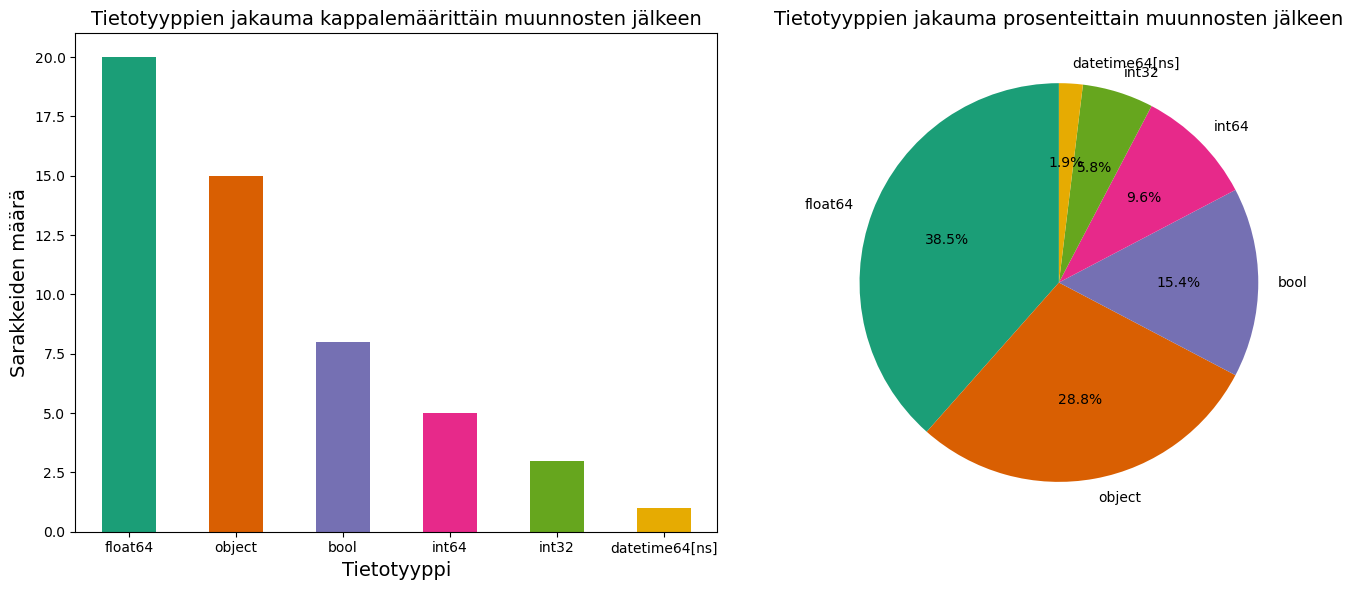

In [13]:
import matplotlib.pyplot as plt

data_types_plot2 = dataframe.dtypes.value_counts()
colors = cm.Dark2.colors

fig, axes = plt.subplots(1, 2, figsize=(14,6))

# Barplot
data_types_plot2.plot(
    kind="bar",
    ax=axes[0],
    color=colors
)

axes[0].tick_params(axis="x", rotation=0)
axes[0].set_title("Tietotyyppien jakauma kappalemäärittäin muunnosten jälkeen", fontsize=14)
axes[0].set_xlabel("Tietotyyppi", fontsize=14)
axes[0].set_ylabel("Sarakkeiden määrä", fontsize=14)

# Pie
data_types_plot2.plot(
    kind="pie",
    ax=axes[1],
    autopct="%1.1f%%",
    startangle=90,
    ylabel="",
    colors=colors
)

axes[1].set_title("Tietotyyppien jakauma prosenteittain muunnosten jälkeen", fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()

### Numeeristen sarakkeiden tilastollinen yhteenveto

In [14]:
print("Statistical Summary of Numerical Columns:")
dataframe = dataframe.query('year >= 1990')
round(dataframe.select_dtypes(exclude = ['object']).describe() , 2)

Statistical Summary of Numerical Columns:


,back_legroom,city_fuel_economy,daysonmarket,dealer_zip,engine_displacement,front_legroom,fuel_tank_volume,height,highway_fuel_economy,horsepower,...,wheelbase,width,year,listed_year,listed_month,listed_dayofweek,power_hp,power_rpm,torque_value,torque_rpm
count,91705.00,83974.00,99909.00,99909.00,94638.00,94216.0,94990.00,95002.00,83974.00,94638.00,...,95002.00,95002.00,99909.00,99909.00,99909.00,99909.00,85674.00,96.00,84627.00,1542.00
mean,37.67,22.24,77.57,14346.02,2801.92,42.1,18.24,65.08,29.09,245.40,...,113.21,78.43,2017.59,2019.92,7.24,3.39,248.89,615.56,258.34,201.00
min,0.00,8.00,0.00,922.00,700.00,35.8,1.90,43.90,11.00,70.00,...,73.50,61.40,1990.00,2014.00,1.00,0.00,70.00,516.00,68.00,200.00
25%,35.80,18.00,14.00,6704.00,2000.00,41.0,14.90,58.10,25.00,176.00,...,106.30,72.60,2017.00,2020.00,7.00,2.00,179.00,600.00,178.00,200.00
50%,38.00,21.00,36.00,7960.00,2500.00,41.8,17.40,65.50,28.00,241.00,...,110.60,78.30,2019.00,2020.00,8.00,3.00,245.00,600.00,258.00,200.00
75%,39.40,25.00,82.00,11743.00,3500.00,43.0,20.00,69.30,32.00,295.00,...,115.00,83.50,2020.00,2020.00,8.00,5.00,300.00,650.00,295.00,200.00
max,49.00,127.00,2150.00,98108.00,8400.00,67.0,63.50,117.60,127.00,808.00,...,201.00,105.90,2021.00,2020.00,12.00,6.00,808.00,650.00,935.00,400.00
std,2.95,7.81,109.36,15501.11,1159.02,1.6,4.65,7.28,7.06,86.52,...,11.72,7.12,3.55,0.30,2.12,1.64,87.67,40.10,103.66,8.87


## Kategoriset sarakkeet:

- Katsotaan mitä arvoja jäljelle jääneet kategoriset "object" -tyyppiset sarakkeet pitävät sisällään.

- Nämä pitää esikäsitellä mallin ymmärtämään muotoon, esim. encoding.

- Osassa sarakkeita on liikaa uniikkeja arvoja enkoodauksen kannalta.
    - Katsotaan, voidaanko ryhmitellä arvoja, jotta enkoodauksesta tulisi kannattavampaa
    - Harkitaan, voidaanko sarake poistaa: Onko sarakkeessa oleva tieto tärkeä lopputuloksen kannalta

In [15]:
cat_cols = dataframe.select_dtypes(include=['object']).columns
for col in cat_cols:
    unique_values = dataframe[col].unique()
    print(f"Total unique values: {len(unique_values)}")
    print("Top 10 most common values:")
    print(dataframe[col].value_counts().head(10))  # Show top 10 most common values
    print("\n")


Total unique values: 10
Top 10 most common values:
body_type
SUV / Crossover    52651
Sedan              26907
Pickup Truck        8905
Hatchback           2594
Coupe               2223
Van                 2133
Minivan             1811
Wagon               1401
Convertible          890
Name: count, dtype: int64


Total unique values: 425
Top 10 most common values:
city
Clinton Township    1734
Brooklyn            1638
Danbury             1502
Novi                1452
Stamford            1374
Rochester Hills     1335
Bronx               1326
Waterbury           1309
Huntington          1187
Nashua              1156
Name: count, dtype: int64


Total unique values: 4294
Top 10 most common values:
exterior_color
Black                              7031
White                              4407
Gray                               3144
Silver                             2256
Summit White                       2069
Blue                               1949
Oxford White                       1491
Red

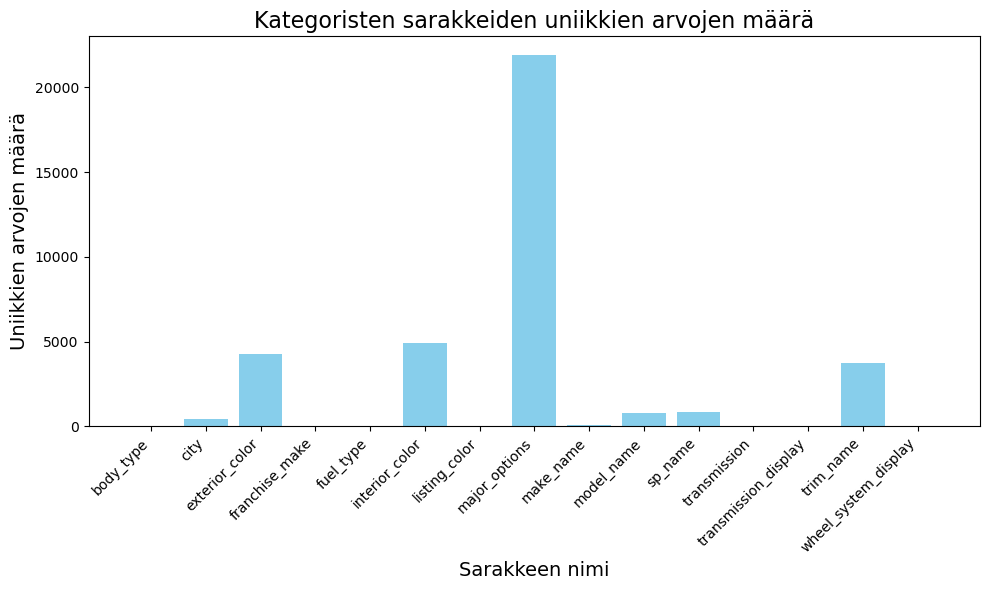

In [16]:
import matplotlib.pyplot as plt

cat_cols = dataframe.select_dtypes(include=['object']).columns

unique_counts = {col: dataframe[col].nunique() for col in cat_cols}


plt.figure(figsize=(10,6))
plt.bar(unique_counts.keys(), unique_counts.values(), color="skyblue")

plt.title("Kategoristen sarakkeiden uniikkien arvojen määrä", fontsize=16)
plt.xlabel("Sarakkeen nimi", fontsize=14)
plt.ylabel("Uniikkien arvojen määrä", fontsize=14)
plt.xticks(rotation=45, ha="right")

plt.tight_layout()
plt.show()


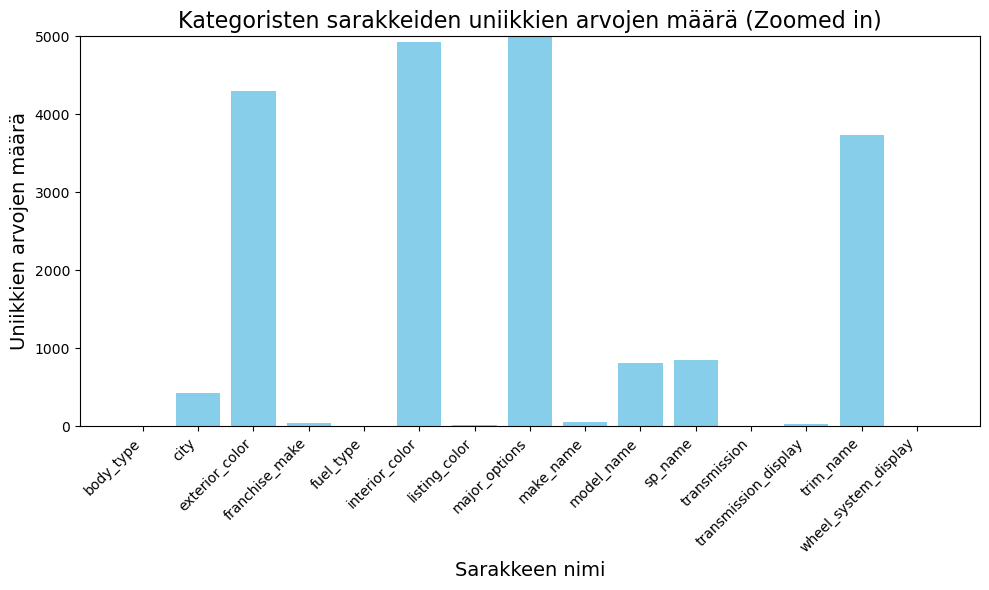

In [17]:
# Zoomattu pylväskaavio
plt.figure(figsize=(10, 6))

plt.bar(unique_counts.keys(), unique_counts.values(), color="skyblue")

plt.title("Kategoristen sarakkeiden uniikkien arvojen määrä (Zoomed in)", fontsize=16)
plt.xlabel("Sarakkeen nimi", fontsize=14)
plt.ylabel("Uniikkien arvojen määrä", fontsize=14)
plt.xticks(rotation=45, ha="right")

# Zoomattu y-akselin mukaan
plt.ylim(0, 5000)

plt.tight_layout()
plt.show()


### Sisältävätkö kategoriset sarakkeet NaN-arvoja:

In [18]:
cat_cols = dataframe.select_dtypes(include=['object']).columns

# Calculate null counts for each categorical column
null_counts = dataframe[cat_cols].isnull().sum().sort_values(ascending=False)
print(null_counts)

franchise_make          25339
interior_color          11775
major_options            6407
wheel_system_display     4562
trim_name                3800
fuel_type                2399
exterior_color           1391
transmission             1001
transmission_display     1001
body_type                 394
city                        0
listing_color               0
make_name                   0
model_name                  0
sp_name                     0
dtype: int64


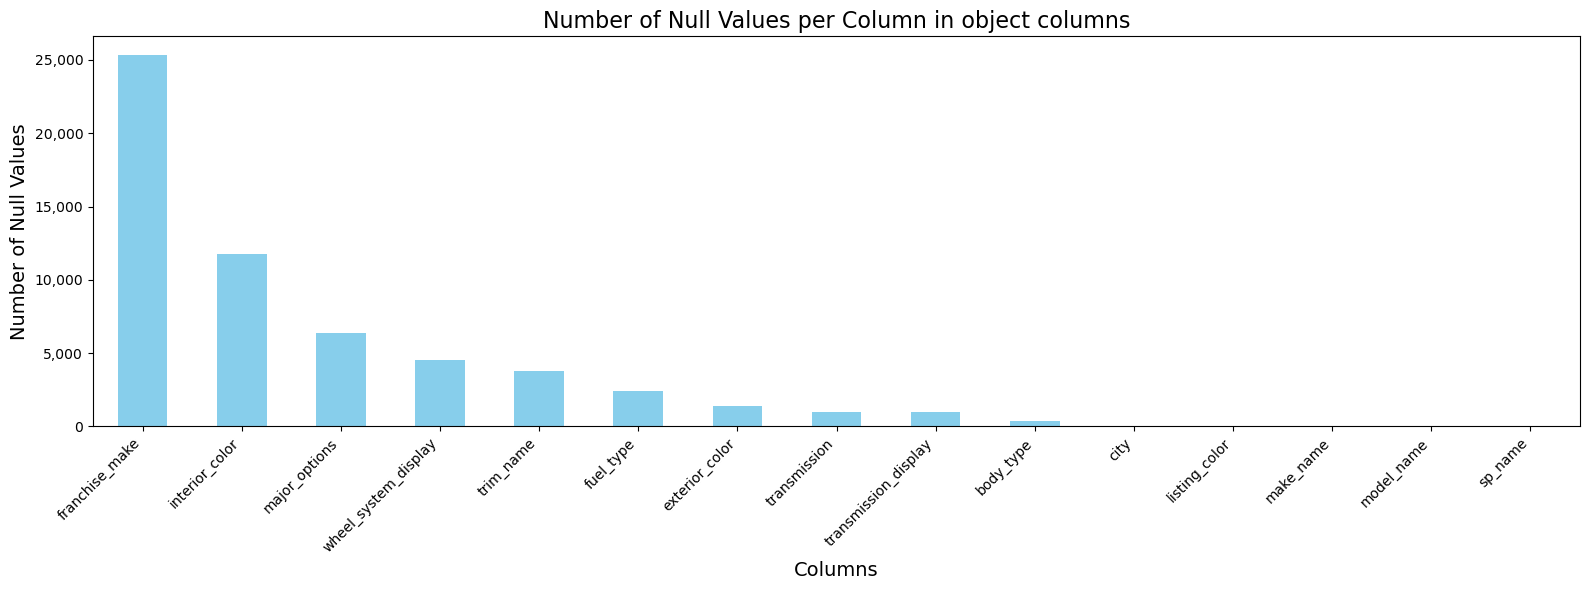

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 6))
null_counts.plot.bar(color='skyblue')
plt.title('Number of Null Values per Column in object columns', fontsize=16)
plt.xlabel('Columns', fontsize=14)
plt.ylabel('Number of Null Values', fontsize=14)
plt.xticks(rotation=45, ha='right')

plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.tight_layout()
plt.show()

## NaN-arvojen kasittely

- Katsotaan sarakkeittain NaN-arvojen määriä suuruusjärjestyksessä, sis sekä numeeriset että kategoriset sarakkeet
- Yhdistetään 'make_name' ja 'franchise_make' -sarakkeet, sillä suuri osa arvoista yhtenäisiä
- Poistetaan sarakkeet, jotka pitävät sisällään suurimman määrän NaN-arvoja
- Lopuksi poistetaan kaikki rivit, jotka pitävät sisällään NaN-arvoja

In [20]:
nan_counts = pd.DataFrame({'Column': dataframe.columns, 'NaN_Count': dataframe.isna().sum()}).reset_index(drop=True)
nan_counts_sorted = nan_counts.sort_values(by='NaN_Count', ascending=False).reset_index(drop=True)

print(f"Rivien määrä: {len(dataframe)}")
print(f"Sarakkeiden määrä: {len(dataframe.columns)}")
print("tyhjien arvojen määrä per sarake")
print(nan_counts_sorted)

Rivien määrä: 99909
Sarakkeiden määrä: 52
tyhjien arvojen määrä per sarake
                  Column  NaN_Count
0              power_rpm      99813
1             torque_rpm      98367
2            owner_count      45663
3         franchise_make      25339
4      city_fuel_economy      15935
5   highway_fuel_economy      15935
6           torque_value      15282
7               power_hp      14235
8         interior_color      11775
9           back_legroom       8204
10         major_options       6407
11         front_legroom       5693
12            horsepower       5271
13   engine_displacement       5271
14      fuel_tank_volume       4919
15       maximum_seating       4908
16                 width       4907
17                height       4907
18             wheelbase       4907
19                length       4907
20  wheel_system_display       4562
21             trim_name       3800
22               mileage       3552
23             fuel_type       2399
24        exterior_color 

In [21]:
# Filter rows with non-NaN values in 'power_rpm'
filtered_df = dataframe[dataframe['power_rpm'].notna()]

len(filtered_df)

96

In [22]:
# Replace NaN in franchise_make with values from make_name
dataframe['franchise_make'] = dataframe['franchise_make'].fillna(dataframe['make_name'])

# Find rows where franchise_make is different from make_name
mismatch_count = (dataframe['franchise_make'] != dataframe['make_name']).sum()

print(f"Number of rows with different franchise_make and make_name: {mismatch_count}")

Number of rows with different franchise_make and make_name: 10957


In [23]:
#tarkistetaan nyt franchise make

nan_counts = pd.DataFrame({'Column': dataframe.columns, 'NaN_Count': dataframe.isna().sum()}).reset_index(drop=True)
nan_counts_sorted = nan_counts.sort_values(by='NaN_Count', ascending=False).reset_index(drop=True)

print(f"Rivien määrä: {len(dataframe)}")
print(f"Sarakkeiden määrä: {len(dataframe.columns)}")
print("tyhjien arvojen määrä per sarake")
print(nan_counts_sorted)

Rivien määrä: 99909
Sarakkeiden määrä: 52
tyhjien arvojen määrä per sarake
                  Column  NaN_Count
0              power_rpm      99813
1             torque_rpm      98367
2            owner_count      45663
3   highway_fuel_economy      15935
4      city_fuel_economy      15935
5           torque_value      15282
6               power_hp      14235
7         interior_color      11775
8           back_legroom       8204
9          major_options       6407
10         front_legroom       5693
11   engine_displacement       5271
12            horsepower       5271
13      fuel_tank_volume       4919
14       maximum_seating       4908
15             wheelbase       4907
16                 width       4907
17                length       4907
18                height       4907
19  wheel_system_display       4562
20             trim_name       3800
21               mileage       3552
22             fuel_type       2399
23        exterior_color       1391
24          transmission 

In [24]:
#poistetaan eniten tyhjiä arvoja sisältävät sarakkeet
dataframe.drop(columns=['power_rpm', 'torque_rpm', 'owner_count'], inplace=True)

nan_counts = pd.DataFrame({'Column': dataframe.columns, 'NaN_Count': dataframe.isna().sum()}).reset_index(drop=True)
nan_counts_sorted = nan_counts.sort_values(by='NaN_Count', ascending=False).reset_index(drop=True)

print(f"Rivien määrä: {len(dataframe)}")
print(f"Sarakkeiden määrä: {len(dataframe.columns)}")
print("tyhjien arvojen määrä per sarake")
print(nan_counts_sorted.head(10))

Rivien määrä: 99909
Sarakkeiden määrä: 49
tyhjien arvojen määrä per sarake
                 Column  NaN_Count
0  highway_fuel_economy      15935
1     city_fuel_economy      15935
2          torque_value      15282
3              power_hp      14235
4        interior_color      11775
5          back_legroom       8204
6         major_options       6407
7         front_legroom       5693
8   engine_displacement       5271
9            horsepower       5271


In [25]:
#Testataan paljonko jää rivejä jos poistetaan kaikki NaN

cleaned_df = dataframe.dropna()

print(cleaned_df.shape)

(59125, 49)


In [26]:
#Testataan jos poistetaan seuraavat 3 suurinta NaN arvollista saraketta, sekä power_hp joka on jo horsepower -sarakkeessa.

#poistetaan eniten tyhjiä arvoja sisältävät sarakkeet
dataframe.drop(columns=['torque_value', 'highway_fuel_economy', 'city_fuel_economy', 'power_hp'], inplace=True)


nan_counts = pd.DataFrame({'Column': dataframe.columns, 'NaN_Count': dataframe.isna().sum()}).reset_index(drop=True)
nan_counts_sorted = nan_counts.sort_values(by='NaN_Count', ascending=False).reset_index(drop=True)

print(f"Rivien määrä: {len(dataframe)}")
print(f"Sarakkeiden määrä: {len(dataframe.columns)}")
print("tyhjien arvojen määrä per sarake")
print(nan_counts_sorted.head(10))

Rivien määrä: 99909
Sarakkeiden määrä: 45
tyhjien arvojen määrä per sarake
                Column  NaN_Count
0       interior_color      11775
1         back_legroom       8204
2        major_options       6407
3        front_legroom       5693
4  engine_displacement       5271
5           horsepower       5271
6     fuel_tank_volume       4919
7      maximum_seating       4908
8                width       4907
9            wheelbase       4907


In [27]:
#Testataan paljonko jää rivejä jos poistetaan kaikki NaN
#sp_name:ssa myyjän lisäämiä asioita esim. GT, Sport, kaupunki missä myynnissä
#trim_name trimmattu nimi
#transmission_display tarkemmat arvot vaihteille, monta erilaista tekstiä, jätetään transmission -sarake kuvaamaan automati, manual, ctv ja dual clutchia.
dataframe.drop(columns=['exterior_color', 'interior_color', 'sp_name', 'trim_name', 'transmission_display'], inplace=True)


cleaned_df2 = dataframe.dropna()

print(cleaned_df2.shape)
print(cleaned_df2.columns)
pd.set_option('display.max_columns', None)

#len(cleaned_df2['sp_name'].unique())
cleaned_df2.head(5)


(81269, 40)
Index(['back_legroom', 'body_type', 'city', 'daysonmarket', 'dealer_zip',
       'engine_displacement', 'fleet', 'frame_damaged', 'franchise_dealer',
       'franchise_make', 'front_legroom', 'fuel_tank_volume', 'fuel_type',
       'has_accidents', 'height', 'horsepower', 'isCab', 'is_new', 'length',
       'listed_date', 'listing_color', 'major_options', 'make_name',
       'maximum_seating', 'mileage', 'model_name', 'price', 'salvage',
       'savings_amount', 'seller_rating', 'sp_id', 'theft_title',
       'transmission', 'wheel_system_display', 'wheelbase', 'width', 'year',
       'listed_year', 'listed_month', 'listed_dayofweek'],
      dtype='object')


,back_legroom,body_type,city,daysonmarket,dealer_zip,engine_displacement,fleet,frame_damaged,franchise_dealer,franchise_make,front_legroom,fuel_tank_volume,fuel_type,has_accidents,height,horsepower,isCab,is_new,length,listed_date,listing_color,major_options,make_name,maximum_seating,mileage,model_name,price,salvage,savings_amount,seller_rating,sp_id,theft_title,transmission,wheel_system_display,wheelbase,width,year,listed_year,listed_month,listed_dayofweek
0,35.1,SUV / Crossover,Bayamon,522,960,1300.0,True,True,True,Jeep,41.2,12.7,Gasoline,True,66.5,177.0,True,True,166.6,2019-04-06,YELLOW,['Quick Order Package'],Jeep,5.0,7.0,Renegade,23141.0,True,0,2.8,370599,True,A,Front-Wheel Drive,101.2,79.6,2019,2019,4,5
1,38.1,SUV / Crossover,San Juan,207,922,2000.0,True,True,True,Land Rover,39.1,17.7,Gasoline,True,68.0,246.0,True,True,181.0,2020-02-15,BLACK,['Adaptive Cruise Control'],Land Rover,7.0,8.0,Discovery Sport,46500.0,True,0,3.0,389227,True,A,All-Wheel Drive,107.9,85.6,2020,2020,2,5
4,38.1,SUV / Crossover,San Juan,137,922,2000.0,True,True,True,Land Rover,39.1,17.7,Gasoline,True,68.0,246.0,True,True,181.0,2020-04-25,BLACK,['Adaptive Cruise Control'],Land Rover,7.0,7.0,Discovery Sport,48880.0,True,0,3.0,389227,True,A,All-Wheel Drive,107.9,85.6,2020,2020,4,5
5,37.1,SUV / Crossover,San Juan,242,922,2000.0,False,False,True,Land Rover,40.2,16.6,Gasoline,False,66.3,247.0,False,True,188.9,2020-01-11,UNKNOWN,"['Leather Seats', 'Sunroof/Moonroof', 'Navigat...",Land Rover,5.0,12.0,Range Rover Velar,66903.0,False,0,3.0,389227,False,A,All-Wheel Drive,113.1,84.4,2020,2020,1,5
6,35.1,Sedan,Bayamon,447,960,2500.0,True,True,True,Jeep,42.3,13.2,Gasoline,True,56.9,186.0,True,True,183.5,2019-06-20,SILVER,"['Alloy Wheels', 'Bluetooth', 'Backup Camera']",Mazda,5.0,14.0,MAZDA3,23695.0,True,0,2.8,370599,True,A,Front-Wheel Drive,107.3,70.7,2019,2019,6,3


## Datan One-Hot enkoodaus

### One-Hot enkoodaus "fuel_type"-sarake

In [28]:
cleaned_df2['fuel_type'].unique()

cleaned_df2 = pd.get_dummies(cleaned_df2, columns=['fuel_type'], prefix='fuel_type')
cleaned_df2.head(2)

,back_legroom,body_type,city,daysonmarket,dealer_zip,engine_displacement,fleet,frame_damaged,franchise_dealer,franchise_make,front_legroom,fuel_tank_volume,has_accidents,height,horsepower,isCab,is_new,length,listed_date,listing_color,major_options,make_name,maximum_seating,mileage,model_name,price,salvage,savings_amount,seller_rating,sp_id,theft_title,transmission,wheel_system_display,wheelbase,width,year,listed_year,listed_month,listed_dayofweek,fuel_type_Biodiesel,fuel_type_Diesel,fuel_type_Flex Fuel Vehicle,fuel_type_Gasoline,fuel_type_Hybrid
0,35.1,SUV / Crossover,Bayamon,522,960,1300.0,True,True,True,Jeep,41.2,12.7,True,66.5,177.0,True,True,166.6,2019-04-06,YELLOW,['Quick Order Package'],Jeep,5.0,7.0,Renegade,23141.0,True,0,2.8,370599,True,A,Front-Wheel Drive,101.2,79.6,2019,2019,4,5,False,False,False,True,False
1,38.1,SUV / Crossover,San Juan,207,922,2000.0,True,True,True,Land Rover,39.1,17.7,True,68.0,246.0,True,True,181.0,2020-02-15,BLACK,['Adaptive Cruise Control'],Land Rover,7.0,8.0,Discovery Sport,46500.0,True,0,3.0,389227,True,A,All-Wheel Drive,107.9,85.6,2020,2020,2,5,False,False,False,True,False


### One-Hot enkoodaus "wheel_system_display"-sarake

In [29]:
cleaned_df2['wheel_system_display'].unique()

cleaned_df2 = pd.get_dummies(cleaned_df2, columns=['wheel_system_display'], prefix='wheel')
cleaned_df2.head(2)

,back_legroom,body_type,city,daysonmarket,dealer_zip,engine_displacement,fleet,frame_damaged,franchise_dealer,franchise_make,front_legroom,fuel_tank_volume,has_accidents,height,horsepower,isCab,is_new,length,listed_date,listing_color,major_options,make_name,maximum_seating,mileage,model_name,price,salvage,savings_amount,seller_rating,sp_id,theft_title,transmission,wheelbase,width,year,listed_year,listed_month,listed_dayofweek,fuel_type_Biodiesel,fuel_type_Diesel,fuel_type_Flex Fuel Vehicle,fuel_type_Gasoline,fuel_type_Hybrid,wheel_4X2,wheel_All-Wheel Drive,wheel_Four-Wheel Drive,wheel_Front-Wheel Drive,wheel_Rear-Wheel Drive
0,35.1,SUV / Crossover,Bayamon,522,960,1300.0,True,True,True,Jeep,41.2,12.7,True,66.5,177.0,True,True,166.6,2019-04-06,YELLOW,['Quick Order Package'],Jeep,5.0,7.0,Renegade,23141.0,True,0,2.8,370599,True,A,101.2,79.6,2019,2019,4,5,False,False,False,True,False,False,False,False,True,False
1,38.1,SUV / Crossover,San Juan,207,922,2000.0,True,True,True,Land Rover,39.1,17.7,True,68.0,246.0,True,True,181.0,2020-02-15,BLACK,['Adaptive Cruise Control'],Land Rover,7.0,8.0,Discovery Sport,46500.0,True,0,3.0,389227,True,A,107.9,85.6,2020,2020,2,5,False,False,False,True,False,False,True,False,False,False


### One-Hot enkoodaus "transmission"-sarake

In [30]:
cleaned_df2['transmission'].unique()

cleaned_df2 = pd.get_dummies(cleaned_df2, columns=['transmission'], prefix='transmission')
cleaned_df2.head(2)

,back_legroom,body_type,city,daysonmarket,dealer_zip,engine_displacement,fleet,frame_damaged,franchise_dealer,franchise_make,front_legroom,fuel_tank_volume,has_accidents,height,horsepower,isCab,is_new,length,listed_date,listing_color,major_options,make_name,maximum_seating,mileage,model_name,price,salvage,savings_amount,seller_rating,sp_id,theft_title,wheelbase,width,year,listed_year,listed_month,listed_dayofweek,fuel_type_Biodiesel,fuel_type_Diesel,fuel_type_Flex Fuel Vehicle,fuel_type_Gasoline,fuel_type_Hybrid,wheel_4X2,wheel_All-Wheel Drive,wheel_Four-Wheel Drive,wheel_Front-Wheel Drive,wheel_Rear-Wheel Drive,transmission_A,transmission_CVT,transmission_Dual Clutch,transmission_M
0,35.1,SUV / Crossover,Bayamon,522,960,1300.0,True,True,True,Jeep,41.2,12.7,True,66.5,177.0,True,True,166.6,2019-04-06,YELLOW,['Quick Order Package'],Jeep,5.0,7.0,Renegade,23141.0,True,0,2.8,370599,True,101.2,79.6,2019,2019,4,5,False,False,False,True,False,False,False,False,True,False,True,False,False,False
1,38.1,SUV / Crossover,San Juan,207,922,2000.0,True,True,True,Land Rover,39.1,17.7,True,68.0,246.0,True,True,181.0,2020-02-15,BLACK,['Adaptive Cruise Control'],Land Rover,7.0,8.0,Discovery Sport,46500.0,True,0,3.0,389227,True,107.9,85.6,2020,2020,2,5,False,False,False,True,False,False,True,False,False,False,True,False,False,False


### One-Hot enkoodaus "body_type"-sarake

In [31]:
cleaned_df2['body_type'].unique()

cleaned_df2 = pd.get_dummies(cleaned_df2, columns=['body_type'], prefix='body_type')
cleaned_df2.head(2)

,back_legroom,city,daysonmarket,dealer_zip,engine_displacement,fleet,frame_damaged,franchise_dealer,franchise_make,front_legroom,fuel_tank_volume,has_accidents,height,horsepower,isCab,is_new,length,listed_date,listing_color,major_options,make_name,maximum_seating,mileage,model_name,price,salvage,savings_amount,seller_rating,sp_id,theft_title,wheelbase,width,year,listed_year,listed_month,listed_dayofweek,fuel_type_Biodiesel,fuel_type_Diesel,fuel_type_Flex Fuel Vehicle,fuel_type_Gasoline,fuel_type_Hybrid,wheel_4X2,wheel_All-Wheel Drive,wheel_Four-Wheel Drive,wheel_Front-Wheel Drive,wheel_Rear-Wheel Drive,transmission_A,transmission_CVT,transmission_Dual Clutch,transmission_M,body_type_Convertible,body_type_Coupe,body_type_Hatchback,body_type_Minivan,body_type_Pickup Truck,body_type_SUV / Crossover,body_type_Sedan,body_type_Van,body_type_Wagon
0,35.1,Bayamon,522,960,1300.0,True,True,True,Jeep,41.2,12.7,True,66.5,177.0,True,True,166.6,2019-04-06,YELLOW,['Quick Order Package'],Jeep,5.0,7.0,Renegade,23141.0,True,0,2.8,370599,True,101.2,79.6,2019,2019,4,5,False,False,False,True,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,True,False,False,False
1,38.1,San Juan,207,922,2000.0,True,True,True,Land Rover,39.1,17.7,True,68.0,246.0,True,True,181.0,2020-02-15,BLACK,['Adaptive Cruise Control'],Land Rover,7.0,8.0,Discovery Sport,46500.0,True,0,3.0,389227,True,107.9,85.6,2020,2020,2,5,False,False,False,True,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False


### One-Hot enkoodaus "listing_color"-sarake

In [32]:
cleaned_df2['listing_color'].unique()

# Define the color mapping for the listing_color column
color_mapping = {
    'BLACK': 'black, unknown',
    'UNKNOWN': 'black, unknown',
    'YELLOW': 'yellow, orange, gold',
    'ORANGE': 'yellow, orange, gold',
    'GOLD': 'yellow, orange, gold',
    'WHITE': 'white, gray, silver',
    'GRAY': 'white, gray, silver',
    'SILVER': 'white, gray, silver',
    'RED': 'red, blue, green, brown',
    'BLUE': 'red, blue, green, brown',
    'GREEN': 'red, blue, green, brown',
    'BROWN': 'red, blue, green, brown',
    'PURPLE': 'purple, pink, teal',
    'PINK': 'purple, pink, teal',
    'TEAL': 'purple, pink, teal'
}

# Create the new column based on the color mapping
cleaned_df2['combined_listing_color'] = cleaned_df2['listing_color'].map(color_mapping)

# Check the result
print(cleaned_df2[['listing_color', 'combined_listing_color']].head())

cleaned_df2 = pd.get_dummies(cleaned_df2, columns=['combined_listing_color'], prefix='listing_color')
cleaned_df2.head(2)

  listing_color combined_listing_color
0        YELLOW   yellow, orange, gold
1         BLACK         black, unknown
4         BLACK         black, unknown
5       UNKNOWN         black, unknown
6        SILVER    white, gray, silver


,back_legroom,city,daysonmarket,dealer_zip,engine_displacement,fleet,frame_damaged,franchise_dealer,franchise_make,front_legroom,fuel_tank_volume,has_accidents,height,horsepower,isCab,is_new,length,listed_date,listing_color,major_options,make_name,maximum_seating,mileage,model_name,price,salvage,savings_amount,seller_rating,sp_id,theft_title,wheelbase,width,year,listed_year,listed_month,listed_dayofweek,fuel_type_Biodiesel,fuel_type_Diesel,fuel_type_Flex Fuel Vehicle,fuel_type_Gasoline,fuel_type_Hybrid,wheel_4X2,wheel_All-Wheel Drive,wheel_Four-Wheel Drive,wheel_Front-Wheel Drive,wheel_Rear-Wheel Drive,transmission_A,transmission_CVT,transmission_Dual Clutch,transmission_M,body_type_Convertible,body_type_Coupe,body_type_Hatchback,body_type_Minivan,body_type_Pickup Truck,body_type_SUV / Crossover,body_type_Sedan,body_type_Van,body_type_Wagon,"listing_color_black, unknown","listing_color_purple, pink, teal","listing_color_red, blue, green, brown","listing_color_white, gray, silver","listing_color_yellow, orange, gold"
0,35.1,Bayamon,522,960,1300.0,True,True,True,Jeep,41.2,12.7,True,66.5,177.0,True,True,166.6,2019-04-06,YELLOW,['Quick Order Package'],Jeep,5.0,7.0,Renegade,23141.0,True,0,2.8,370599,True,101.2,79.6,2019,2019,4,5,False,False,False,True,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True
1,38.1,San Juan,207,922,2000.0,True,True,True,Land Rover,39.1,17.7,True,68.0,246.0,True,True,181.0,2020-02-15,BLACK,['Adaptive Cruise Control'],Land Rover,7.0,8.0,Discovery Sport,46500.0,True,0,3.0,389227,True,107.9,85.6,2020,2020,2,5,False,False,False,True,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False


### One-Hot enkoodaus "major_options"-sarake

In [33]:
# Ominaisuuksien yleisyys datassa
major_options_counts = cleaned_df2["major_options"].str.strip("[]").str.replace("'", "").str.split(", ").explode().value_counts()
print(major_options_counts)

major_options
Backup Camera                          64655
Alloy Wheels                           56095
Bluetooth                              54935
Heated Seats                           39100
Sunroof/Moonroof                       35324
                                       ...  
Quiet Package                              1
Levant Package                             1
Preferred Premium Accessory Package        1
Courtesy Lights Illum Package              1
Journey Package                            1
Name: count, Length: 137, dtype: int64


137 kpl eri ominaisuuksia, kaikkia ei voi eikä kannata ottaa mukaan, sillä muuten tulee liikaa sarakkeita, eikä loppupäässä ominaisuudet ole tarpeeksi yleisiä. 

Testataan kuinka paljon valitut ominaisuudet kattavat

In [34]:
covers_from_cars = major_options_counts.cumsum() / major_options_counts.sum()

optimal_features = (covers_from_cars <= 0.80).sum()
print(f"Jos valitaan {optimal_features} kpl ominaisuuksia, se kattaisi 80 % datasta.")

Jos valitaan 12 kpl ominaisuuksia, se kattaisi 80 % datasta.


In [35]:
print("Valitut ominaisuudet olisivat:\n")
print(major_options_counts.head(12))


Valitut ominaisuudet olisivat:

major_options
Backup Camera            64655
Alloy Wheels             56095
Bluetooth                54935
Heated Seats             39100
Sunroof/Moonroof         35324
Navigation System        34288
Remote Start             26921
Leather Seats            25256
Blind Spot Monitoring    24940
CarPlay                  21912
Android Auto             18837
Parking Sensors          15755
Name: count, dtype: int64


In [36]:
import ast

# Varmistetaan, että kaikki arvot ovat listoja
cleaned_df2['major_options'] = cleaned_df2['major_options'].apply(
    lambda x: ast.literal_eval(x) if isinstance(x, str) else x
)

print(cleaned_df2["major_options"].head(10))

0                                 [Quick Order Package]
1                             [Adaptive Cruise Control]
4                             [Adaptive Cruise Control]
5     [Leather Seats, Sunroof/Moonroof, Navigation S...
6              [Alloy Wheels, Bluetooth, Backup Camera]
7                             [Adaptive Cruise Control]
8     [Navigation System, Backup Camera, Blind Spot ...
9     [Leather Seats, Navigation System, Adaptive Cr...
11                                [Convenience Package]
13                            [Adaptive Cruise Control]
Name: major_options, dtype: object


Testataan ottaa 12 yleisintä ominaisuutta ja muut ominaisuudet voitaisiin ryhmitellä yhteen.

In [37]:
top_12_options = major_options_counts.head(12).index

def clean_major_options(options):

    cleaned_options = [option for option in options if option in top_12_options]
    if len(cleaned_options) < len(options):
        cleaned_options.append("Other Option")
    
    return cleaned_options

cleaned_df2["major_options"] = cleaned_df2["major_options"].apply(clean_major_options)

print(cleaned_df2["major_options"].head(10))


0                                        [Other Option]
1                                        [Other Option]
4                                        [Other Option]
5     [Leather Seats, Sunroof/Moonroof, Navigation S...
6              [Alloy Wheels, Bluetooth, Backup Camera]
7                                        [Other Option]
8     [Navigation System, Backup Camera, Blind Spot ...
9     [Leather Seats, Navigation System, Alloy Wheel...
11                                       [Other Option]
13                                       [Other Option]
Name: major_options, dtype: object


In [38]:
top_12_options = [
    'Backup Camera', 'Alloy Wheels', 'Bluetooth', 'Heated Seats', 'Sunroof/Moonroof',
    'Navigation System', 'Remote Start', 'Leather Seats', 'Blind Spot Monitoring',
    'CarPlay', 'Android Auto', 'Parking Sensors'#, "Adaptive Cruise Control", "Third Row Seating", "Premium Package",
    #"Quick Order Package", "Convenience Package", "Steel Wheels", "Cold Weather Package", "Power Package"
]

all_options = top_12_options + ['Other Option']

print(all_options)


# Funktio, joka luo binäärikolumnit
def encode_options(options):
    encoding = {option: 1 if option in options else 0 for option in all_options}
    return encoding

# Käytetään funktiota DataFrameen
major_options_encoded = cleaned_df2["major_options"].apply(encode_options).apply(pd.Series)

major_options_encoded.columns = ["major_options_" + col for col in major_options_encoded.columns]

# Yhdistetään alkuperäisen DataFrame kanssa
cleaned_df2 = pd.concat([cleaned_df2, major_options_encoded], axis=1)


cleaned_df2.head(2)


['Backup Camera', 'Alloy Wheels', 'Bluetooth', 'Heated Seats', 'Sunroof/Moonroof', 'Navigation System', 'Remote Start', 'Leather Seats', 'Blind Spot Monitoring', 'CarPlay', 'Android Auto', 'Parking Sensors', 'Other Option']


,back_legroom,city,daysonmarket,dealer_zip,engine_displacement,fleet,frame_damaged,franchise_dealer,franchise_make,front_legroom,fuel_tank_volume,has_accidents,height,horsepower,isCab,is_new,length,listed_date,listing_color,major_options,make_name,maximum_seating,mileage,model_name,price,salvage,savings_amount,seller_rating,sp_id,theft_title,wheelbase,width,year,listed_year,listed_month,listed_dayofweek,fuel_type_Biodiesel,fuel_type_Diesel,fuel_type_Flex Fuel Vehicle,fuel_type_Gasoline,fuel_type_Hybrid,wheel_4X2,wheel_All-Wheel Drive,wheel_Four-Wheel Drive,wheel_Front-Wheel Drive,wheel_Rear-Wheel Drive,transmission_A,transmission_CVT,transmission_Dual Clutch,transmission_M,body_type_Convertible,body_type_Coupe,body_type_Hatchback,body_type_Minivan,body_type_Pickup Truck,body_type_SUV / Crossover,body_type_Sedan,body_type_Van,body_type_Wagon,"listing_color_black, unknown","listing_color_purple, pink, teal","listing_color_red, blue, green, brown","listing_color_white, gray, silver","listing_color_yellow, orange, gold",major_options_Backup Camera,major_options_Alloy Wheels,major_options_Bluetooth,major_options_Heated Seats,major_options_Sunroof/Moonroof,major_options_Navigation System,major_options_Remote Start,major_options_Leather Seats,major_options_Blind Spot Monitoring,major_options_CarPlay,major_options_Android Auto,major_options_Parking Sensors,major_options_Other Option
0,35.1,Bayamon,522,960,1300.0,True,True,True,Jeep,41.2,12.7,True,66.5,177.0,True,True,166.6,2019-04-06,YELLOW,[Other Option],Jeep,5.0,7.0,Renegade,23141.0,True,0,2.8,370599,True,101.2,79.6,2019,2019,4,5,False,False,False,True,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,0,0,0,0,0,0,0,0,0,0,0,0,1
1,38.1,San Juan,207,922,2000.0,True,True,True,Land Rover,39.1,17.7,True,68.0,246.0,True,True,181.0,2020-02-15,BLACK,[Other Option],Land Rover,7.0,8.0,Discovery Sport,46500.0,True,0,3.0,389227,True,107.9,85.6,2020,2020,2,5,False,False,False,True,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,0,0,0,0,0,0,0,0,0,0,0,0,1


In [39]:
cleaned_df2 = cleaned_df2.drop(columns=["major_options"])
cleaned_df2.head(2)

,back_legroom,city,daysonmarket,dealer_zip,engine_displacement,fleet,frame_damaged,franchise_dealer,franchise_make,front_legroom,fuel_tank_volume,has_accidents,height,horsepower,isCab,is_new,length,listed_date,listing_color,make_name,maximum_seating,mileage,model_name,price,salvage,savings_amount,seller_rating,sp_id,theft_title,wheelbase,width,year,listed_year,listed_month,listed_dayofweek,fuel_type_Biodiesel,fuel_type_Diesel,fuel_type_Flex Fuel Vehicle,fuel_type_Gasoline,fuel_type_Hybrid,wheel_4X2,wheel_All-Wheel Drive,wheel_Four-Wheel Drive,wheel_Front-Wheel Drive,wheel_Rear-Wheel Drive,transmission_A,transmission_CVT,transmission_Dual Clutch,transmission_M,body_type_Convertible,body_type_Coupe,body_type_Hatchback,body_type_Minivan,body_type_Pickup Truck,body_type_SUV / Crossover,body_type_Sedan,body_type_Van,body_type_Wagon,"listing_color_black, unknown","listing_color_purple, pink, teal","listing_color_red, blue, green, brown","listing_color_white, gray, silver","listing_color_yellow, orange, gold",major_options_Backup Camera,major_options_Alloy Wheels,major_options_Bluetooth,major_options_Heated Seats,major_options_Sunroof/Moonroof,major_options_Navigation System,major_options_Remote Start,major_options_Leather Seats,major_options_Blind Spot Monitoring,major_options_CarPlay,major_options_Android Auto,major_options_Parking Sensors,major_options_Other Option
0,35.1,Bayamon,522,960,1300.0,True,True,True,Jeep,41.2,12.7,True,66.5,177.0,True,True,166.6,2019-04-06,YELLOW,Jeep,5.0,7.0,Renegade,23141.0,True,0,2.8,370599,True,101.2,79.6,2019,2019,4,5,False,False,False,True,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,0,0,0,0,0,0,0,0,0,0,0,0,1
1,38.1,San Juan,207,922,2000.0,True,True,True,Land Rover,39.1,17.7,True,68.0,246.0,True,True,181.0,2020-02-15,BLACK,Land Rover,7.0,8.0,Discovery Sport,46500.0,True,0,3.0,389227,True,107.9,85.6,2020,2020,2,5,False,False,False,True,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,0,0,0,0,0,0,0,0,0,0,0,0,1


Tällaisenaan "Other options" sarake, joka sisältää kaikki muut ominaisuudet jotka eivät ole 12 suosituimman joukossa, sisältäisi lukumäärältää aika paljon ominaisuuksia..

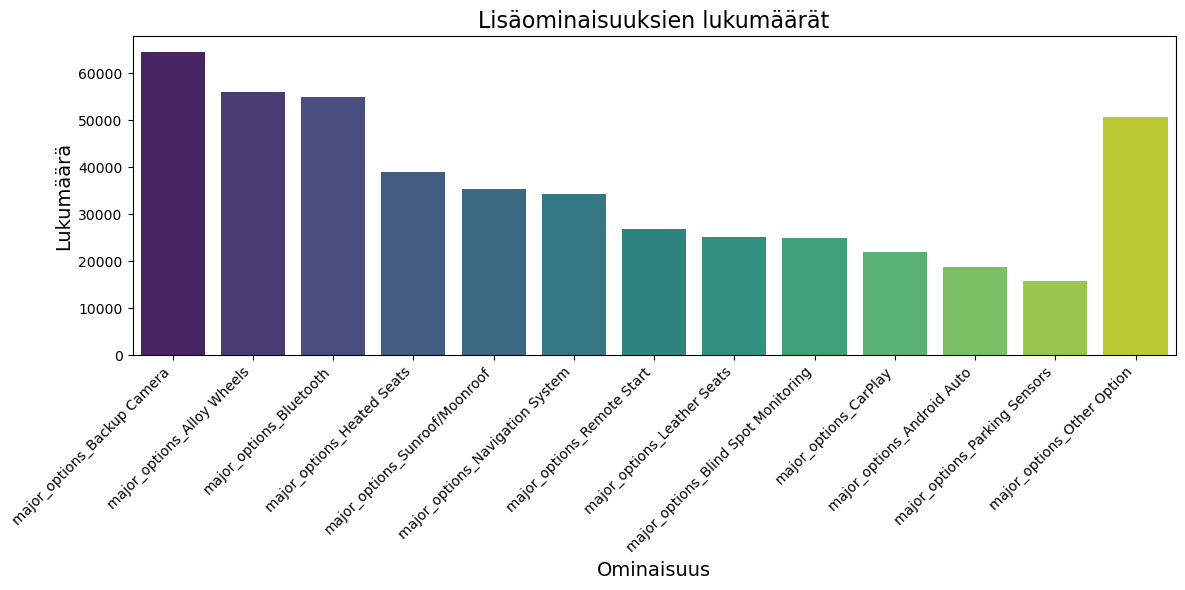

In [40]:
import seaborn as sns

major_options_cols = cleaned_df2.filter(like='major_options').columns

option_counts = cleaned_df2[major_options_cols].sum()

plt.figure(figsize=(12,6))
sns.barplot(x=option_counts.index, y=option_counts.values, palette="viridis")

plt.title("Lisäominaisuuksien lukumäärät", fontsize=16)
plt.xlabel("Ominaisuus", fontsize=14)
plt.ylabel("Lukumäärä", fontsize=14)
plt.xticks(rotation=45, ha="right")

plt.tight_layout()
plt.show()



## Poikkeavien arvojen tunnistaminen (Outliers)

- Tulostetaan jokaisen numeerisen sarakkeen:
    - Alimmat (0,5 %) poikkeavat arvot
    - Ylimmät (99,5 %) oikkeavat arvot

In [41]:
import pandas as pd

# Define a function to identify outliers in each numerical column
def check_outliers(cleaned_df2, threshold=0.5):
    outlier_rows = {}
    
    # Loop through all numerical columns in the dataframe
    for col in cleaned_df2.select_dtypes(include=['number']).columns:
        # Calculate the 0.5% min and max thresholds
        min_threshold = cleaned_df2[col].quantile(threshold / 100)
        max_threshold = cleaned_df2[col].quantile(1 - threshold / 100)
        
        # Identify rows that are below the min threshold or above the max threshold
        min_outliers = cleaned_df2[cleaned_df2[col] <= min_threshold]
        max_outliers = cleaned_df2[cleaned_df2[col] >= max_threshold]
        
        # Store the counts and the rows for both min and max outliers
        outlier_rows[col] = {
            'min_count': len(min_outliers),
            'max_count': len(max_outliers),
            'min_outliers_head': min_outliers.head()[col],
            'max_outliers_head': max_outliers.head()[col]
        }
    
    return outlier_rows

# Apply the function to your DataFrame (use cleaned_df2 as an example)
outlier_info = check_outliers(cleaned_df2)

# Show only the column names and the head of the outliers
for col, info in outlier_info.items():
    print(f"Column: {col}")
    print(f"  - Bottom 0.5% Head:")
    print(info['min_outliers_head'])
    print(f"  - Top 0.5% Head:")
    print(info['max_outliers_head'])
    print('-' * 40)


Column: back_legroom
  - Bottom 0.5% Head:
40     27.3
71     27.1
393    27.1
410     0.0
529    27.2
Name: back_legroom, dtype: float64
  - Top 0.5% Head:
663     45.2
1148    45.2
1291    45.2
1305    45.2
1403    45.2
Name: back_legroom, dtype: float64
----------------------------------------
Column: daysonmarket
  - Bottom 0.5% Head:
644     0
745     0
1162    0
1307    0
1314    0
Name: daysonmarket, dtype: int64
  - Top 0.5% Head:
239     589
688     633
691     698
861     677
1343    570
Name: daysonmarket, dtype: int64
----------------------------------------
Column: dealer_zip
  - Bottom 0.5% Head:
0    960
1    922
4    922
5    922
6    960
Name: dealer_zip, dtype: int64
  - Top 0.5% Head:
2849    49203
2859    49203
2860    49203
2879    49203
2892    49203
Name: dealer_zip, dtype: int64
----------------------------------------
Column: engine_displacement
  - Bottom 0.5% Head:
0      1300.0
27     1300.0
33     1300.0
59     1300.0
130    1300.0
Name: engine_displacement

## Datan visualisointeja

100%|█████████████████████████████████████████████████████████████████████████| 81269/81269 [00:01<00:00, 67429.87it/s]


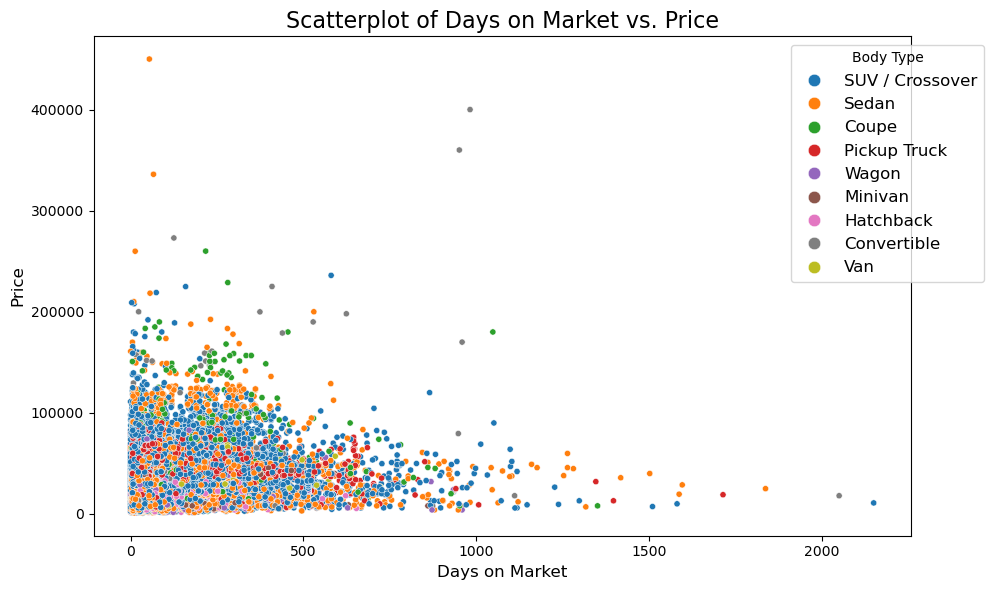

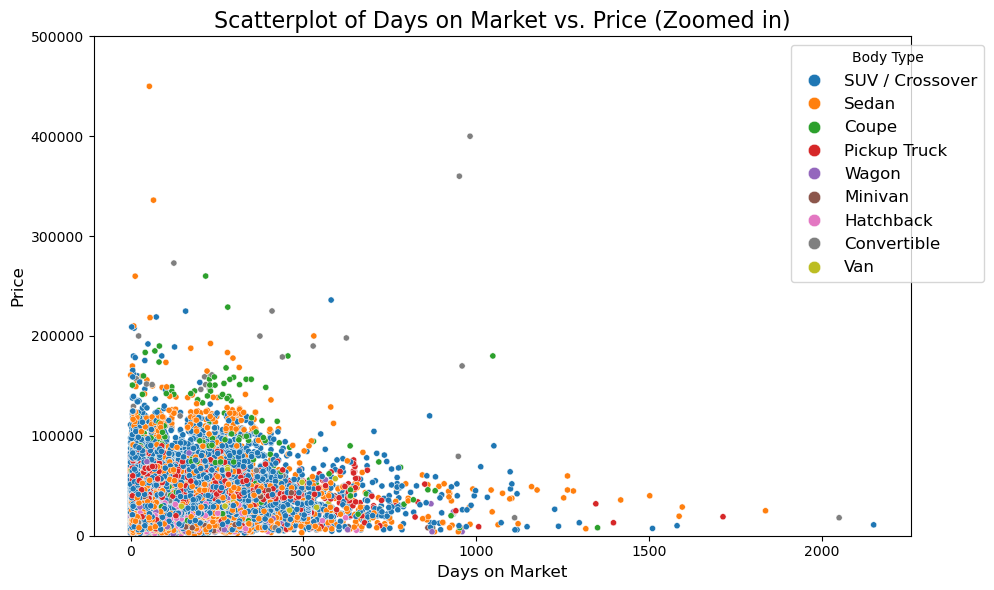

In [42]:
import seaborn as sns
# Ensure tqdm works with pandas apply
tqdm.pandas()

# Identify all columns starting with 'body_'
body_columns = [col for col in cleaned_df2.columns if col.startswith('body_')]

# Create a new column 'body_color' that will store the color for each point
def assign_color(row):
    # Check which 'body_' column has a True value and assign the column name as the color
    for col in body_columns:
        if row[col] == True:
            return col  # Use the column name as the color
    return 'gray'  # Default color for rows with no True values

# Apply the function to create the 'body_color' column with a progress bar
cleaned_df2['body_color'] = cleaned_df2.progress_apply(assign_color, axis=1)

# Create the first scatterplot (entire range)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='daysonmarket', y='price', data=cleaned_df2, hue='body_color', palette='tab10', legend='full', s=20)  # Adjusted size with s=20

# Set the title and labels for the first plot
plt.title('Scatterplot of Days on Market vs. Price', fontsize=16)
plt.xlabel('Days on Market', fontsize=12)
plt.ylabel('Price', fontsize=12)

# Customize the legend
handles, labels = plt.gca().get_legend_handles_labels()
# Update the legend labels to show in the desired format
new_labels = [label.replace('body_type_', '') for label in labels]

# Increase the size of the legend markers
plt.legend(handles=handles, labels=new_labels, title='Body Type', loc='upper right', bbox_to_anchor=(1.1, 1), fontsize=12, markerscale=2)

# Show the first plot
plt.tight_layout()
plt.show()

# Create the second scatterplot (zoomed-in on price)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='daysonmarket', y='price', data=cleaned_df2, hue='body_color', palette='tab10', legend='full', s=20)  # Adjusted size with s=20

# Set the title and labels for the second plot
plt.title('Scatterplot of Days on Market vs. Price (Zoomed in)', fontsize=16)
plt.xlabel('Days on Market', fontsize=12)
plt.ylabel('Price', fontsize=12)

# Zoom into the price axis (limit to 500,000)
plt.ylim(0, 500000)

# Customize the legend again
handles, labels = plt.gca().get_legend_handles_labels()
new_labels = [label.replace('body_type_', '') for label in labels]

# Increase the size of the legend markers
plt.legend(handles=handles, labels=new_labels, title='Body Type', loc='upper right', bbox_to_anchor=(1.1, 1), fontsize=12, markerscale=2)

# Show the second plot
plt.tight_layout()
plt.show()


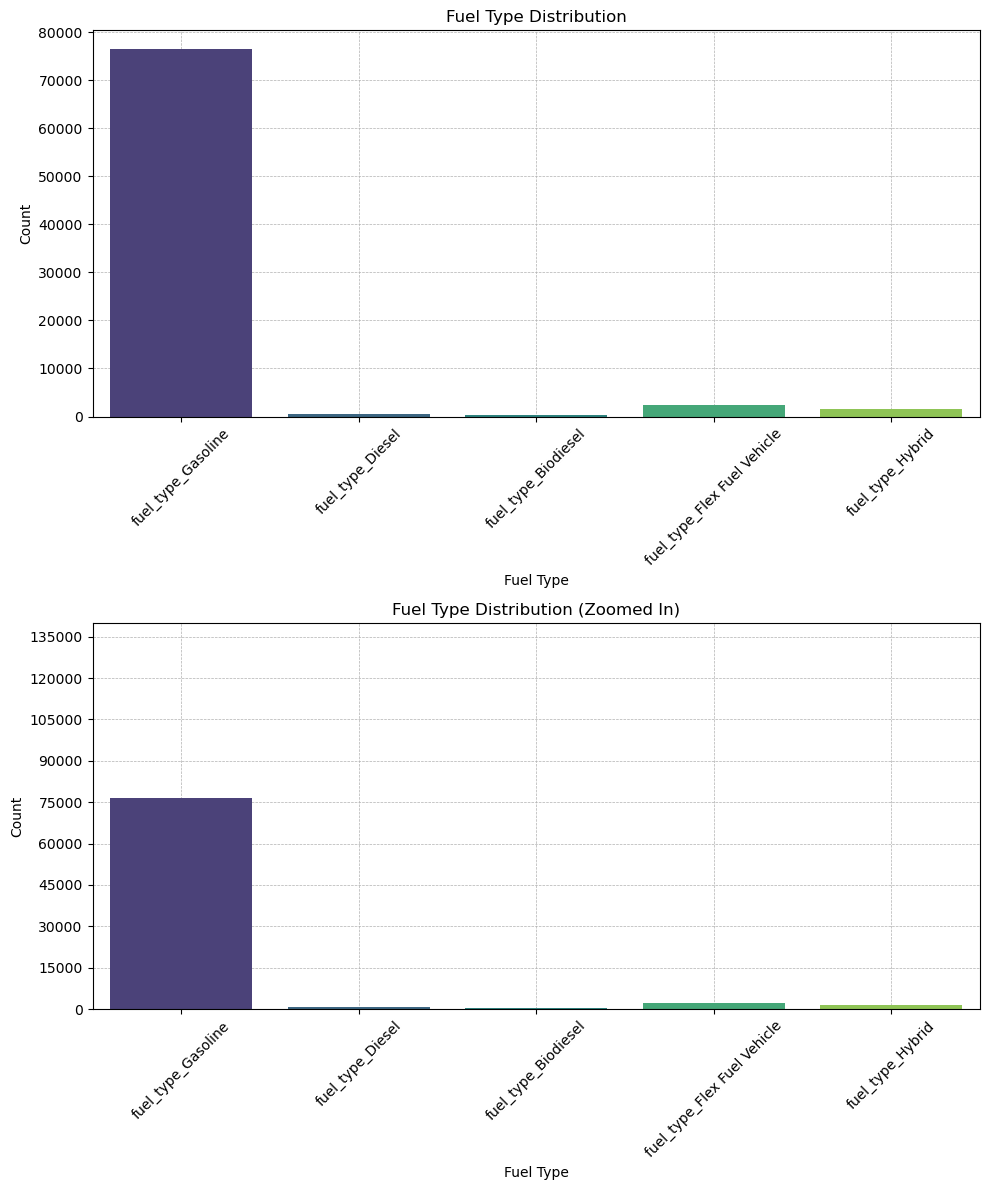

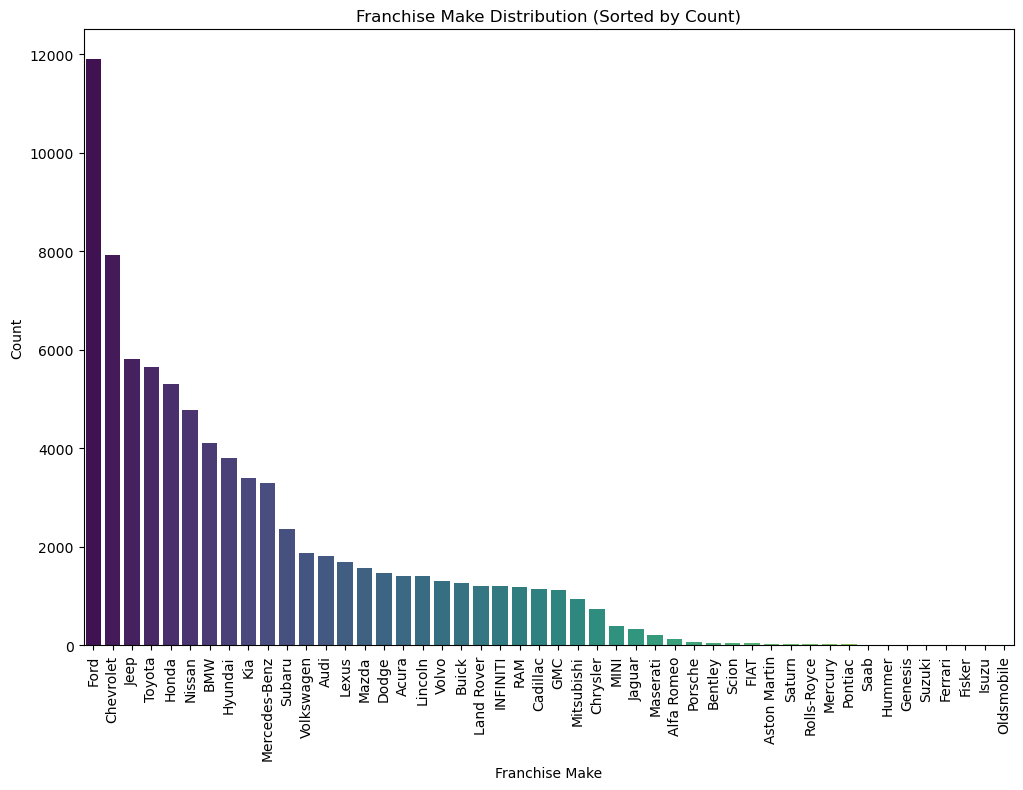

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MaxNLocator

# fuel_type_columns after one-hot encoding
fuel_type_columns = ['fuel_type_Biodiesel', 'fuel_type_Diesel', 'fuel_type_Flex Fuel Vehicle', 'fuel_type_Gasoline', 'fuel_type_Hybrid']

# Create new 'fuel_type' column, tells fueltype
cleaned_df2['fuel_type'] = cleaned_df2[fuel_type_columns].idxmax(axis=1)

# Create a 2x1 grid for the subplots
fig, axes = plt.subplots(2, 1, figsize=(10, 12))

# Plot the full distribution of fuel types
sns.countplot(x='fuel_type', data=cleaned_df2, palette='viridis', ax=axes[0], zorder=2)
axes[0].set_title('Fuel Type Distribution')
axes[0].set_xlabel('Fuel Type')
axes[0].set_ylabel('Count')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)
axes[0].yaxis.set_major_locator(MaxNLocator(integer=True))
axes[0].grid(True, which='both', linestyle='--', linewidth=0.5, zorder=1)

# Plot the zoomed-in distribution (up to 200,000)
sns.countplot(x='fuel_type', data=cleaned_df2, palette='viridis', ax=axes[1], zorder=2)
axes[1].set_title('Fuel Type Distribution (Zoomed In)')
axes[1].set_xlabel('Fuel Type')
axes[1].set_ylabel('Count')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)
# Set the y-axis limit for zoom
axes[1].set_ylim(0, 140000)
axes[1].yaxis.set_major_locator(MaxNLocator(integer=True))
axes[1].grid(True, which='both', linestyle='--', linewidth=0.5, zorder=1)


plt.tight_layout()
plt.show()

# Get sorted value counts for franchise_make
sorted_make_counts = cleaned_df2['franchise_make'].value_counts().sort_values(ascending=False)

# Plot sorted distribution of franchise makes
plt.figure(figsize=(12, 8))
sns.countplot(x='franchise_make', data=cleaned_df2, order=sorted_make_counts.index, palette='viridis')
plt.title('Franchise Make Distribution (Sorted by Count)')
plt.xlabel('Franchise Make')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate x-axis labels if necessary
plt.show()

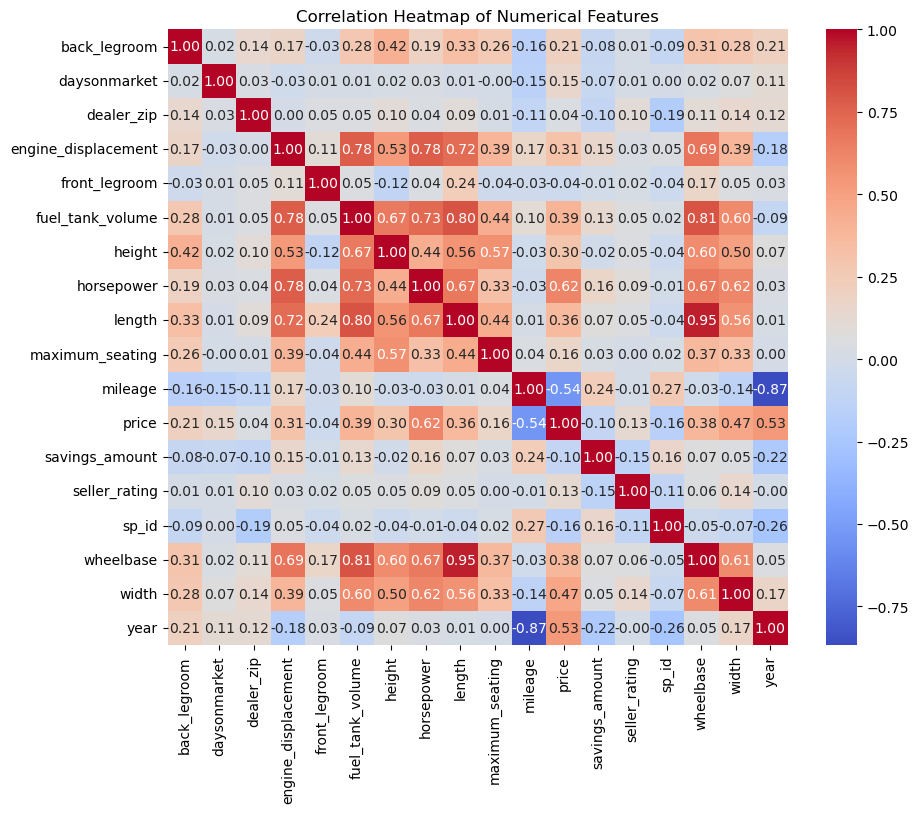

In [44]:
# Select numerical features for correlation heatmap
#numerical_columns = cleaned_df2.select_dtypes(include=['float64', 'int64']).columns
numerical_columns = [col for col in cleaned_df2.select_dtypes(include=['float64', 'int64']).columns if not col.startswith('major_options')]
corr_matrix = cleaned_df2[numerical_columns].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

In [45]:
from collections import defaultdict
boolean_columns = cleaned_df2.dtypes == 'bool'
bool_columns_list = cleaned_df2.columns[boolean_columns].tolist()

grouped_columns = defaultdict(list)
for col in bool_columns_list:
    prefix = col.split('_')[0]  # Extract prefix (substring before the first '_')
    grouped_columns[prefix].append(col)

# Convert defaultdict to a regular dictionary for easier reading
grouped_columns = dict(grouped_columns)

# Display the grouped columns
for group, items in grouped_columns.items():
    print(f"{group}: {items}")

fleet: ['fleet']
frame: ['frame_damaged']
franchise: ['franchise_dealer']
has: ['has_accidents']
isCab: ['isCab']
is: ['is_new']
salvage: ['salvage']
theft: ['theft_title']
fuel: ['fuel_type_Biodiesel', 'fuel_type_Diesel', 'fuel_type_Flex Fuel Vehicle', 'fuel_type_Gasoline', 'fuel_type_Hybrid']
wheel: ['wheel_4X2', 'wheel_All-Wheel Drive', 'wheel_Four-Wheel Drive', 'wheel_Front-Wheel Drive', 'wheel_Rear-Wheel Drive']
transmission: ['transmission_A', 'transmission_CVT', 'transmission_Dual Clutch', 'transmission_M']
body: ['body_type_Convertible', 'body_type_Coupe', 'body_type_Hatchback', 'body_type_Minivan', 'body_type_Pickup Truck', 'body_type_SUV / Crossover', 'body_type_Sedan', 'body_type_Van', 'body_type_Wagon']
listing: ['listing_color_black, unknown', 'listing_color_purple, pink, teal', 'listing_color_red, blue, green, brown', 'listing_color_white, gray, silver', 'listing_color_yellow, orange, gold']


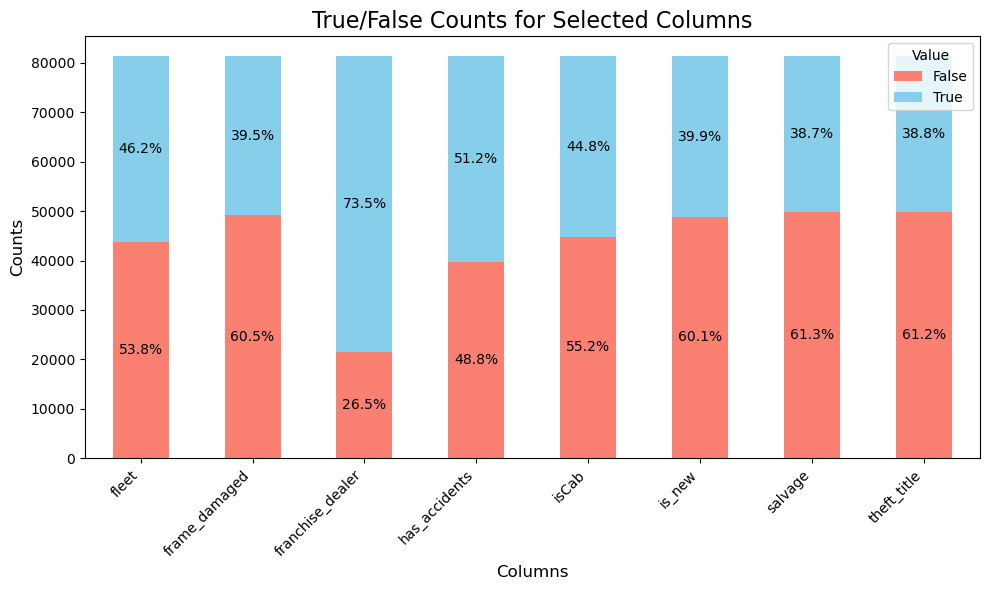

In [46]:
# Define the specific columns
columns = ['fleet', 'frame_damaged', 'franchise_dealer', 'has_accidents', 'isCab', 'is_new', 'salvage', 'theft_title']

# Count True and False values for each column
counts = cleaned_df2[columns].apply(pd.Series.value_counts).fillna(0).astype(int)

# Transpose the counts DataFrame for better plotting (columns become True/False, and indices are the specific column names)
counts = counts.T  # This makes the rows as columns and columns as values

# Plotting the stacked bar chart
ax = counts.plot(kind='bar', stacked=True, color=['salmon', 'skyblue'], figsize=(10, 6))

# Customize the plot
plt.title('True/False Counts for Selected Columns', fontsize=16)
plt.xlabel('Columns', fontsize=12)
plt.ylabel('Counts', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.legend(title='Value', labels=['False', 'True'])

# Display percentages on top of the bars
for i, p in enumerate(ax.patches):
    # Get the total count for each column (True + False)
    total = counts.iloc[i // 2].sum()  # Each column has two bars (True, False), so divide by 2 to get the correct row index
    height = p.get_height()
    
    # Calculate the percentage
    percentage = (height / total) * 100
    
    # Calculate the x-position for each bar and display the percentage text
    x_position = p.get_x() + p.get_width() / 2
    y_position = p.get_y() + height / 2  # Place text in the middle of the bar
    
    ax.text(
        x_position, y_position, f'{percentage:.1f}%', ha='center', va='center', fontsize=10, color='black'
    )

plt.tight_layout()  # Adjust layout to fit all elements
plt.show()


In [47]:
# Count the number of True and False values in the 'fleet' column
true_count_fleet = cleaned_df2['fleet'].value_counts().get(True, 0)
false_count_fleet = cleaned_df2['fleet'].value_counts().get(False, 0)

print(f"Number of True values in 'fleet': {true_count_fleet}")
print(f"Number of False values in 'fleet': {false_count_fleet}")

Number of True values in 'fleet': 37543
Number of False values in 'fleet': 43726


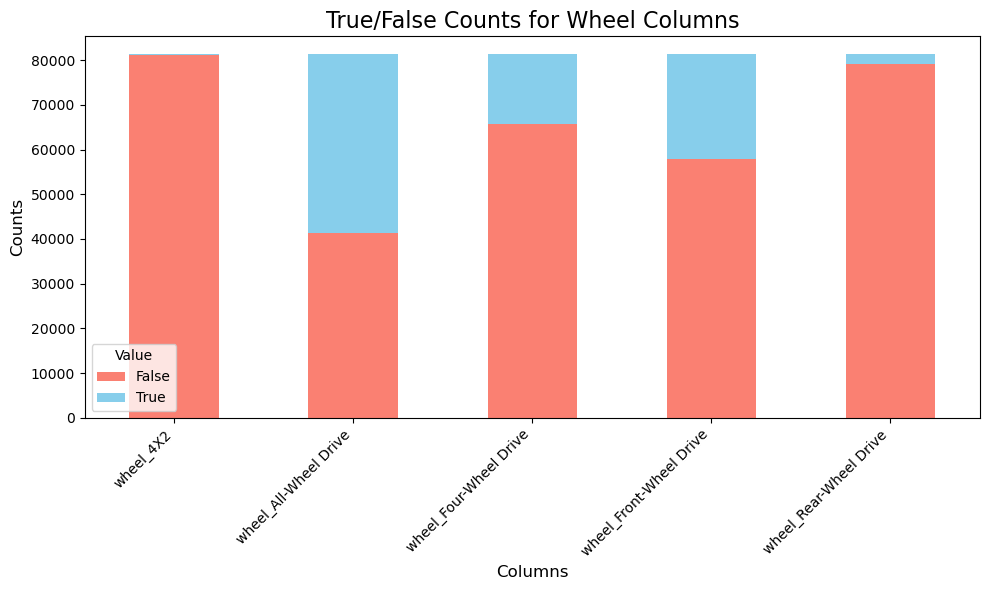

In [48]:
# Filter columns that start with 'wheel'
wheel_columns = [col for col in cleaned_df2.columns if col.startswith('wheel_')]

# Count True and False values for each column
counts = cleaned_df2[wheel_columns].apply(pd.Series.value_counts).fillna(0).astype(int)

# Transpose the counts DataFrame for better plotting
counts = counts.T  # Columns become 'True' and 'False', and indices are 'wheel_*'

# Plotting the stacked bar chart
counts.plot(kind='bar', stacked=True, color=['salmon', 'skyblue'], figsize=(10, 6))

# Customize the plot
plt.title('True/False Counts for Wheel Columns', fontsize=16)
plt.xlabel('Columns', fontsize=12)
plt.ylabel('Counts', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.legend(title='Value', labels=['False', 'True'])
plt.tight_layout()  # Adjust layout to fit all elements

# Show the plot
plt.show()

Processing group: Wheel Columns
True counts for Wheel Columns: wheel_All-Wheel Drive      39952
wheel_Four-Wheel Drive     15629
wheel_Front-Wheel Drive    23318
Other                       2370
dtype: int64


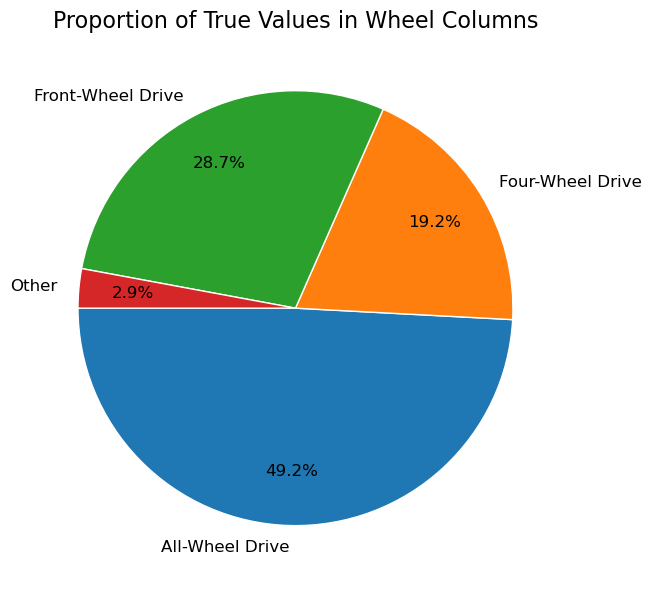

Completed group: Wheel Columns
Processing group: Transmission Columns
True counts for Transmission Columns: transmission_A      67878
transmission_CVT    11829
Other                1562
dtype: int64


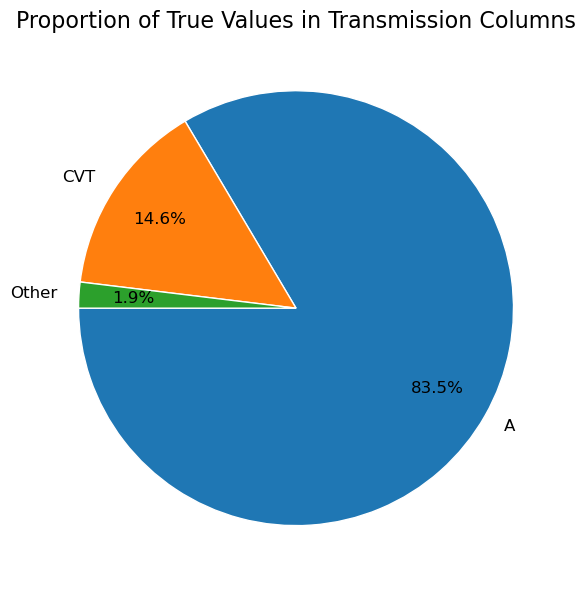

Completed group: Transmission Columns
Processing group: Body Type Columns
True counts for Body Type Columns: body_type_Pickup Truck        6554
body_type_SUV / Crossover    43953
body_type_Sedan              23579
Other                         7183
dtype: int64


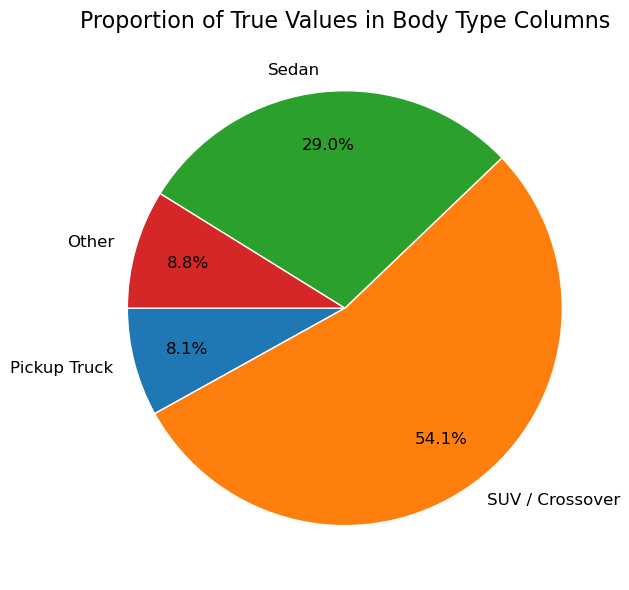

Completed group: Body Type Columns
Processing group: Listing Color Columns
True counts for Listing Color Columns: listing_color_black, unknown             28888
listing_color_red, blue, green, brown    14426
listing_color_white, gray, silver        37189
Other                                      766
dtype: int64


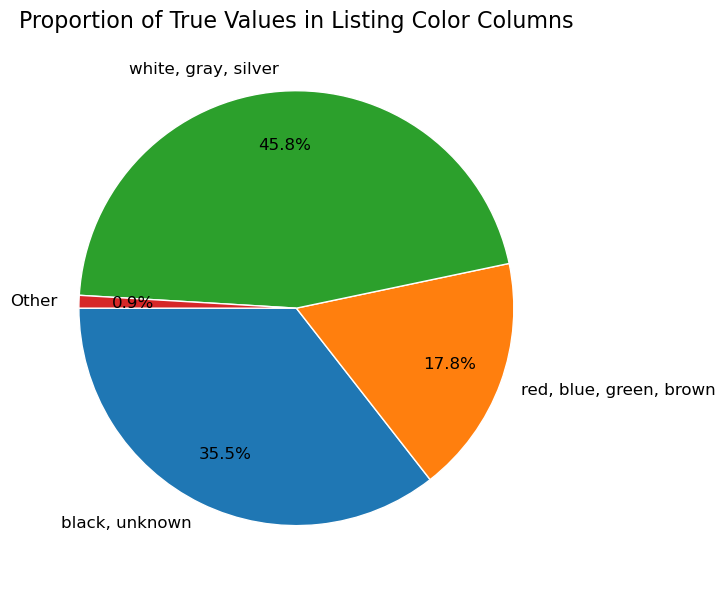

Completed group: Listing Color Columns
Processing group: Major Options Columns
True counts for Major Options Columns: major_options_Backup Camera            64655
major_options_Alloy Wheels             56095
major_options_Bluetooth                54935
major_options_Heated Seats             39100
major_options_Sunroof/Moonroof         35324
major_options_Navigation System        34288
major_options_Remote Start             26921
major_options_Leather Seats            25256
major_options_Blind Spot Monitoring    24940
major_options_CarPlay                  21912
major_options_Android Auto             18837
major_options_Parking Sensors          15755
major_options_Other Option             50665
dtype: int64


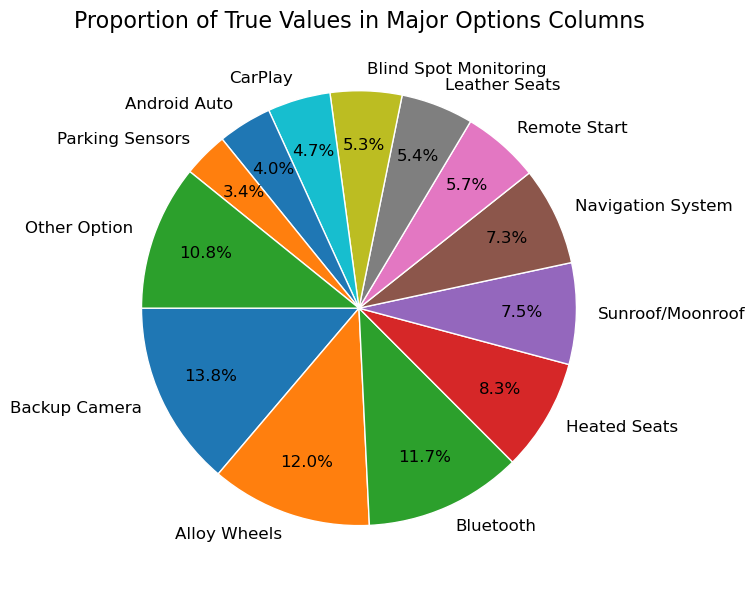

Completed group: Major Options Columns
All groups processed.


In [49]:

# Function to process data and group small percentages into 'Other'
def process_data_for_pie(true_counts):
    total = true_counts.sum()
    percentages = (true_counts / total) * 100
    small_values = percentages < 3  # Threshold for small percentages
    if small_values.any():
        other_value = true_counts[small_values].sum()
        true_counts = true_counts[~small_values]
        true_counts['Other'] = other_value
    return true_counts

# Define prefixes for each group
groups = {
    'wheel_': 'Wheel Columns',
    'transmission_': 'Transmission Columns',
    'body_type_': 'Body Type Columns',
    'listing_color_': 'Listing Color Columns',
    'major_options_': 'Major Options Columns'
}

# Loop through each group and create pie charts
for prefix, title in groups.items():
    print(f"Processing group: {title}")
    
    # Filter columns that start with the prefix
    group_columns = [col for col in cleaned_df2.columns if col.startswith(prefix)]
    
    if not group_columns:
        print(f"No columns found for prefix: {prefix}")
        continue
    
    # Count the True values for each column
    true_counts = cleaned_df2[group_columns].sum()
    
    # Process data for pie chart (combine small percentages into "Other")
    true_counts = process_data_for_pie(true_counts)
    
    print(f"True counts for {title}: {true_counts}")
    
    plt.figure(figsize=(8, 6))
    plt.pie(
        true_counts, 
        labels=true_counts.index.str.replace(prefix, ''), 
        autopct='%1.1f%%', 
        startangle=180, 
        colors=plt.cm.tab10.colors[:len(true_counts)],
        textprops={'fontsize': 12},
        pctdistance=0.75,  # Adjust percentage text to be closer to the center
        wedgeprops={'linewidth': 1, 'edgecolor': 'white'},
    )
    plt.title(f'Proportion of True Values in {title}', fontsize=16)
    plt.tight_layout()
    plt.show()
    print(f"Completed group: {title}")

print("All groups processed.")


# Datan skaalaaminen ja malliin vietävät sarakkeet

In [50]:
from sklearn.preprocessing import LabelEncoder

fuel_type_encoder = LabelEncoder()
make_encoder = LabelEncoder()
city_encoder = LabelEncoder()
model_encoder = LabelEncoder()

#enkoodataan, niin monta saraketta
cleaned_df2['fuel_type_encoded'] = city_encoder.fit_transform(cleaned_df2['fuel_type'])
cleaned_df2['make_encoded'] = make_encoder.fit_transform(cleaned_df2['franchise_make'])
cleaned_df2['city_encoded'] = city_encoder.fit_transform(cleaned_df2['city'])
cleaned_df2['model_encoded'] = model_encoder.fit_transform(cleaned_df2['model_name'])

In [51]:
print(len(cleaned_df2['franchise_make'].unique()))
print(len(cleaned_df2['make_name'].unique()))
list1 = cleaned_df2['franchise_make'].unique()
list2 = cleaned_df2['make_name'].unique()

unique_to_list1 = set(list1) - set(list2)
print(unique_to_list1)

48
47
{'Ferrari'}


Poistetaan siis vielä tuo make_name sillä sisältää vähemmän tietoja kuin franchise_make

In [52]:
# sarakkeet jota jätetään pois mallintamisen vaiheessa, tekstipohjaiset visuaalisaation jälkeen poistettava

pudotettavat = ['listing_color', 'make_name']
enkoodatut = ['fuel_type', 'franchise_make', 'city', 'model_name'] #jatkon kannalta talteen

cleaned_df2.drop(columns=pudotettavat, inplace=True)

final_df = cleaned_df2
final_df.head(2)

,back_legroom,city,daysonmarket,dealer_zip,engine_displacement,fleet,frame_damaged,franchise_dealer,franchise_make,front_legroom,fuel_tank_volume,has_accidents,height,horsepower,isCab,is_new,length,listed_date,maximum_seating,mileage,model_name,price,salvage,savings_amount,seller_rating,sp_id,theft_title,wheelbase,width,year,listed_year,listed_month,listed_dayofweek,fuel_type_Biodiesel,fuel_type_Diesel,fuel_type_Flex Fuel Vehicle,fuel_type_Gasoline,fuel_type_Hybrid,wheel_4X2,wheel_All-Wheel Drive,wheel_Four-Wheel Drive,wheel_Front-Wheel Drive,wheel_Rear-Wheel Drive,transmission_A,transmission_CVT,transmission_Dual Clutch,transmission_M,body_type_Convertible,body_type_Coupe,body_type_Hatchback,body_type_Minivan,body_type_Pickup Truck,body_type_SUV / Crossover,body_type_Sedan,body_type_Van,body_type_Wagon,"listing_color_black, unknown","listing_color_purple, pink, teal","listing_color_red, blue, green, brown","listing_color_white, gray, silver","listing_color_yellow, orange, gold",major_options_Backup Camera,major_options_Alloy Wheels,major_options_Bluetooth,major_options_Heated Seats,major_options_Sunroof/Moonroof,major_options_Navigation System,major_options_Remote Start,major_options_Leather Seats,major_options_Blind Spot Monitoring,major_options_CarPlay,major_options_Android Auto,major_options_Parking Sensors,major_options_Other Option,body_color,fuel_type,fuel_type_encoded,make_encoded,city_encoded,model_encoded
0,35.1,Bayamon,522,960,1300.0,True,True,True,Jeep,41.2,12.7,True,66.5,177.0,True,True,166.6,2019-04-06,5.0,7.0,Renegade,23141.0,True,0,2.8,370599,True,101.2,79.6,2019,2019,4,5,False,False,False,True,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,0,0,0,0,0,0,0,0,0,0,0,0,1,body_type_SUV / Crossover,fuel_type_Gasoline,3,23,15,486
1,38.1,San Juan,207,922,2000.0,True,True,True,Land Rover,39.1,17.7,True,68.0,246.0,True,True,181.0,2020-02-15,7.0,8.0,Discovery Sport,46500.0,True,0,3.0,389227,True,107.9,85.6,2020,2020,2,5,False,False,False,True,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,0,0,0,0,0,0,0,0,0,0,0,0,1,body_type_SUV / Crossover,fuel_type_Gasoline,3,25,305,161


## Boolean-sarakkeet int:ksi

- Muunnetaan boolean-tyyppiset sarakkeet 0/1 muotoon True/False sijaan koko datasetissä

In [53]:
# Valitaan bool-sarakkeet
bool_columns = final_df.select_dtypes(include=["bool"]).columns

# Muunnetaan 0/1 muotoon
final_df[bool_columns] = final_df[bool_columns].astype(int)

final_df[bool_columns].head()


,fleet,frame_damaged,franchise_dealer,has_accidents,isCab,is_new,salvage,theft_title,fuel_type_Biodiesel,fuel_type_Diesel,fuel_type_Flex Fuel Vehicle,fuel_type_Gasoline,fuel_type_Hybrid,wheel_4X2,wheel_All-Wheel Drive,wheel_Four-Wheel Drive,wheel_Front-Wheel Drive,wheel_Rear-Wheel Drive,transmission_A,transmission_CVT,transmission_Dual Clutch,transmission_M,body_type_Convertible,body_type_Coupe,body_type_Hatchback,body_type_Minivan,body_type_Pickup Truck,body_type_SUV / Crossover,body_type_Sedan,body_type_Van,body_type_Wagon,"listing_color_black, unknown","listing_color_purple, pink, teal","listing_color_red, blue, green, brown","listing_color_white, gray, silver","listing_color_yellow, orange, gold"
0,1,1,1,1,1,1,1,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
1,1,1,1,1,1,1,1,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
4,1,1,1,1,1,1,1,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
5,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
6,1,1,1,1,1,1,1,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0


In [54]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 81269 entries, 0 to 99998
Data columns (total 80 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   back_legroom                           81269 non-null  float64       
 1   city                                   81269 non-null  object        
 2   daysonmarket                           81269 non-null  int64         
 3   dealer_zip                             81269 non-null  int64         
 4   engine_displacement                    81269 non-null  float64       
 5   fleet                                  81269 non-null  int32         
 6   frame_damaged                          81269 non-null  int32         
 7   franchise_dealer                       81269 non-null  int32         
 8   franchise_make                         81269 non-null  object        
 9   front_legroom                          81269 non-null  float64    

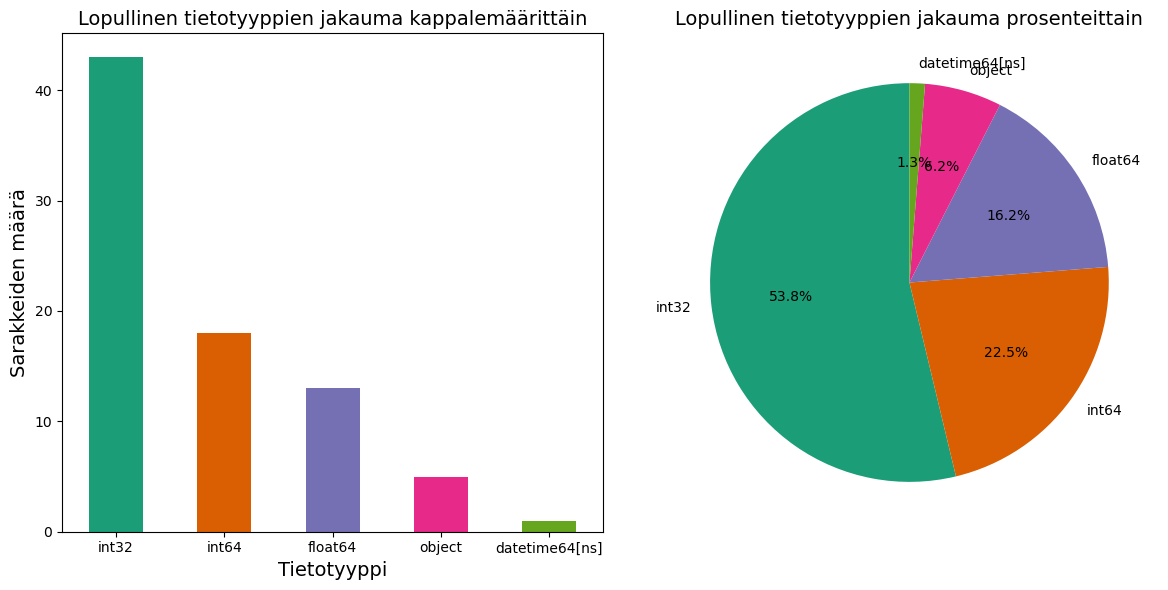

In [55]:
import matplotlib.pyplot as plt

data_types_plot3 = cleaned_df2.dtypes.value_counts()

fig, axes = plt.subplots(1, 2, figsize=(12,6))

# Barplot
data_types_plot3.plot(
    kind="bar",
    ax=axes[0],
    color=colors
)

axes[0].tick_params(axis="x", rotation=0)
axes[0].set_title("Lopullinen tietotyyppien jakauma kappalemäärittäin", fontsize=14)
axes[0].set_xlabel("Tietotyyppi", fontsize=14)
axes[0].set_ylabel("Sarakkeiden määrä", fontsize=14)

# Pie
data_types_plot3.plot(
    kind="pie",
    ax=axes[1],
    autopct="%1.1f%%",
    startangle=90,
    ylabel="",
    colors=colors
)

axes[1].set_title("Lopullinen tietotyyppien jakauma prosenteittain", fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()

## Datan skaalaaminen

In [56]:
#tähän skaalaukset

# katsotaan final_df enne skaalaushommia 

print(final_df.info())

print(final_df.describe())


<class 'pandas.core.frame.DataFrame'>
Index: 81269 entries, 0 to 99998
Data columns (total 80 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   back_legroom                           81269 non-null  float64       
 1   city                                   81269 non-null  object        
 2   daysonmarket                           81269 non-null  int64         
 3   dealer_zip                             81269 non-null  int64         
 4   engine_displacement                    81269 non-null  float64       
 5   fleet                                  81269 non-null  int32         
 6   frame_damaged                          81269 non-null  int32         
 7   franchise_dealer                       81269 non-null  int32         
 8   franchise_make                         81269 non-null  object        
 9   front_legroom                          81269 non-null  float64    

## 1. Skaalaminen riippuu suuresti valittavasta mallintamismetodista

esimerkiksi LabelEncoded arvoja voi käyttää helpommin tree-based malleissa (kuten Random Forest, XGBoost), koska ne osaavat tulkita numeeriset label arvot, eikä suurempi numero vaikuta tuloksiin negatiivisesti.

Milloin LabelEncoder on huono:
Jos käyttää etäisyyteen perustuvia malleja (esim. kNN, SVM, Logistic Regression), jotka käsittelevät koodattuja lukuja järjestyslukuina, mikä saattaa aiheuttaa huonon suorituskyvyn.

## 2. korkea kardinaalisuus(cardinality) 

Strategiat korkean kardinaalisuuden käsittelemiseksi:

esimerkiksi model_encoded ja city_encoded kolumnit pitävät sisällään niin monta unique arvoa, että joudutaan varmaankin testaamaan target encoding esim. price kolumnin kanssa  tai embedding metodia(neuroverkot) Embeddings yhdistävät luokat tiheisiin vektoreihin tavalla, joka nappaa luokkien väliset suhteet.

## 3. valitaan mitä tehdään 

### esim. *

### Model Type                 Recommended Encoding

Tree-based modes----------Use label encoding (okay with high cardinality.

Linear models(LogReg)-----Use one-hot encoding or target encoding.

Distance-based models-----Use one-hot encoding or drop high-cardinality cols.  

Neural networks-----------Use embeddings for high cardinality; one-hot for low.  *low.

## Esimerkkinä Knn tyylinen algo - sen skaalaukset ja setit

In [57]:
# esimerkiksi Knn tyylisen algon skaalaus ja preprosessointi

from sklearn.preprocessing import MinMaxScaler

# skaalataan jatkuvat 0-1 välille minmax scalerin avulla
knn_df = final_df.copy()
numerical_cols = [
    "back_legroom", "daysonmarket", "dealer_zip", "engine_displacement",
    "front_legroom", "fuel_tank_volume", "height", "horsepower",
    "length", "maximum_seating", "mileage", "savings_amount",
    "seller_rating", "sp_id", "wheelbase", "width", "year","listed_year"
]

scaler = MinMaxScaler()
knn_df[numerical_cols] = scaler.fit_transform(knn_df[numerical_cols])





In [58]:
# pudotetaan object tyyppiset kolumnit
object_cols = knn_df.select_dtypes(include=['object']).columns
knn_df = knn_df.drop(columns=object_cols)
# check
num_object_cols = knn_df.select_dtypes(include=['object']).shape[1]
print(f"Number of columns with dtype 'object': {num_object_cols}")

Number of columns with dtype 'object': 0


In [59]:
# drop the label encoded cols for this (not great for disdance based models, as previously discussed) 

columns_to_drop = ["fuel_type_encoded", "make_encoded", "city_encoded", "model_encoded"]

# Drop
knn_df = knn_df.drop(columns=columns_to_drop)

# Check the updated DataFrame
print(knn_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 81269 entries, 0 to 99998
Data columns (total 71 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   back_legroom                           81269 non-null  float64       
 1   daysonmarket                           81269 non-null  float64       
 2   dealer_zip                             81269 non-null  float64       
 3   engine_displacement                    81269 non-null  float64       
 4   fleet                                  81269 non-null  int32         
 5   frame_damaged                          81269 non-null  int32         
 6   franchise_dealer                       81269 non-null  int32         
 7   front_legroom                          81269 non-null  float64       
 8   fuel_tank_volume                       81269 non-null  float64       
 9   has_accidents                          81269 non-null  int32      

In [60]:
# check the scaling

print(knn_df.describe())

       back_legroom  daysonmarket    dealer_zip  engine_displacement  \
count  81269.000000  81269.000000  81269.000000         81269.000000   
mean       0.768583      0.036038      0.134809             0.278980   
min        0.000000      0.000000      0.000000             0.000000   
25%        0.730612      0.006977      0.058578             0.175676   
50%        0.775510      0.017674      0.071389             0.243243   
75%        0.804082      0.038140      0.111168             0.378378   
max        1.000000      1.000000      1.000000             1.000000   
std        0.059331      0.049592      0.156842             0.149679   

              fleet  frame_damaged  franchise_dealer  front_legroom  \
count  81269.000000   81269.000000      81269.000000   81269.000000   
mean       0.461960       0.394652          0.734536       0.378129   
min        0.000000       0.000000          0.000000       0.000000   
25%        0.000000       0.000000          0.000000       0.311377

Tästä voidaan siis vielä työstää pidemmälle pudottamalla listed_date col kokonaan. 

Voidaan myös implimentoida cyclical encoding listed_month ja listed_dayofweek kolumneihin.


In [61]:
import numpy as np

# Drop 'listed_date'
knn_df = knn_df.drop(columns=['listed_date'])

# Apply cyclical encoding for the days and months to better represent their cyclical nature.
knn_df['month_sin'] = np.sin(2 * np.pi * knn_df['listed_month'] / 12)
knn_df['month_cos'] = np.cos(2 * np.pi * knn_df['listed_month'] / 12)
knn_df['day_sin'] = np.sin(2 * np.pi * knn_df['listed_dayofweek'] / 7)
knn_df['day_cos'] = np.cos(2 * np.pi * knn_df['listed_dayofweek'] / 7)

# Drop the original 'listed_month' and 'listed_dayofweek'
knn_df = knn_df.drop(columns=['listed_month', 'listed_dayofweek'])

# Verify the DataFrame
print(knn_df.info())



<class 'pandas.core.frame.DataFrame'>
Index: 81269 entries, 0 to 99998
Data columns (total 72 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   back_legroom                           81269 non-null  float64
 1   daysonmarket                           81269 non-null  float64
 2   dealer_zip                             81269 non-null  float64
 3   engine_displacement                    81269 non-null  float64
 4   fleet                                  81269 non-null  int32  
 5   frame_damaged                          81269 non-null  int32  
 6   franchise_dealer                       81269 non-null  int32  
 7   front_legroom                          81269 non-null  float64
 8   fuel_tank_volume                       81269 non-null  float64
 9   has_accidents                          81269 non-null  int32  
 10  height                                 81269 non-null  float64
 11  horsepo

In [62]:
print(knn_df.describe())

       back_legroom  daysonmarket    dealer_zip  engine_displacement  \
count  81269.000000  81269.000000  81269.000000         81269.000000   
mean       0.768583      0.036038      0.134809             0.278980   
std        0.059331      0.049592      0.156842             0.149679   
min        0.000000      0.000000      0.000000             0.000000   
25%        0.730612      0.006977      0.058578             0.175676   
50%        0.775510      0.017674      0.071389             0.243243   
75%        0.804082      0.038140      0.111168             0.378378   
max        1.000000      1.000000      1.000000             1.000000   

              fleet  frame_damaged  franchise_dealer  front_legroom  \
count  81269.000000   81269.000000      81269.000000   81269.000000   
mean       0.461960       0.394652          0.734536       0.378129   
std        0.498554       0.488779          0.441583       0.085543   
min        0.000000       0.000000          0.000000       0.000000

testataan knn algoa price predictaamiseen 


In [63]:
X = knn_df.drop(columns=['price'])
y = knn_df['price']

In [64]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [65]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize KNN regressor
knn = KNeighborsRegressor(n_neighbors=5)

# Train the model
knn.fit(X_train, y_train)

# Predict
y_pred = knn.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 96625776.85784176
R-squared: 0.6779890364538605


Testataan parantaa mallia optimoiden paremetreja GridSearching avulla 

In [66]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': [3, 5, 7, 10, 15, 20]}
grid_search = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)
print("Best R-squared:", grid_search.best_score_)



Best Parameters: {'n_neighbors': 7}
Best R-squared: 0.6696631990622846


Testataan mallia uudella paramatrilla --- hieman parempi

In [67]:
knn = KNeighborsRegressor(n_neighbors=7)

# Train the model
knn.fit(X_train, y_train)

# Predict
y_pred = knn.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 96123172.42922056
R-squared: 0.679663994644168


## Nyt voidaan testata tree-based mallia(kuten Random Forest), testataan toimiiko label encoded setit

##### Nyt ei tarvitse välttämättä skaalata numeerisia kolumneja, one-hot encoded kolumnit voi pitää sellaisinaan ja label encoded kolumit voi pitää mukana

dropattavat kolumnit ovat siis object kolumnit ja raa’at date kolumnit

tsekataan taas että final_df on aito :D Jes toimii (vihdoin)((päässä reikä))

In [68]:
print(final_df.describe())

       back_legroom  daysonmarket    dealer_zip  engine_displacement  \
count  81269.000000  81269.000000  81269.000000         81269.000000   
mean      37.660586     77.480798  14023.512459          2764.453851   
min        0.000000      0.000000    922.000000           700.000000   
25%       35.800000     15.000000   6615.000000          2000.000000   
50%       38.000000     38.000000   7860.000000          2500.000000   
75%       39.400000     82.000000  11726.000000          3500.000000   
max       49.000000   2150.000000  98108.000000          8100.000000   
std        2.907239    106.623127  15242.863406          1107.628103   

              fleet  frame_damaged  franchise_dealer  front_legroom  \
count  81269.000000   81269.000000      81269.000000   81269.000000   
mean       0.461960       0.394652          0.734536      42.114762   
min        0.000000       0.000000          0.000000      35.800000   
25%        0.000000       0.000000          0.000000      41.000000

In [69]:
# nyt työstetään random forest skaalaus ja jako hinnan predcitaamiseen
# ei tarvita edes cylical encoodamista date hommiiin rf mallissa. 

# dropataan object col
rf_df = final_df.copy()
object_cols = rf_df.select_dtypes(include=['object']).columns
rf_df = rf_df.drop(columns=object_cols)

drop_cols = ['listed_date']
rf_df = rf_df.drop(columns=drop_cols)

In [70]:
# koska käytetään label encoding fuel_typeä, niin voi redundant one-hot encodatut kolumnit poistaa. 

redundant_one_hot = ["fuel_type_Biodiesel", "fuel_type_Diesel", 
                     "fuel_type_Flex Fuel Vehicle", "fuel_type_Gasoline", "fuel_type_Hybrid"]
rf_df.drop(columns=redundant_one_hot, inplace=True)

In [71]:
# testataan suoraan vaan näillä seteillä
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split


# Split data
X = rf_df.drop(columns=['price'])  # Features
y = rf_df['price']  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [72]:
# model train
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [73]:
# nopee välicheckkaus toho
print(rf_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 81269 entries, 0 to 99998
Data columns (total 69 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   back_legroom                           81269 non-null  float64
 1   daysonmarket                           81269 non-null  int64  
 2   dealer_zip                             81269 non-null  int64  
 3   engine_displacement                    81269 non-null  float64
 4   fleet                                  81269 non-null  int32  
 5   frame_damaged                          81269 non-null  int32  
 6   franchise_dealer                       81269 non-null  int32  
 7   front_legroom                          81269 non-null  float64
 8   fuel_tank_volume                       81269 non-null  float64
 9   has_accidents                          81269 non-null  int32  
 10  height                                 81269 non-null  float64
 11  horsepo

In [74]:
# Evaluate the model
y_pred = rf_model.predict(X_test)
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 10122700.929901686
R-squared: 0.9662655164478244


RF-malli suoriutui hyvin.

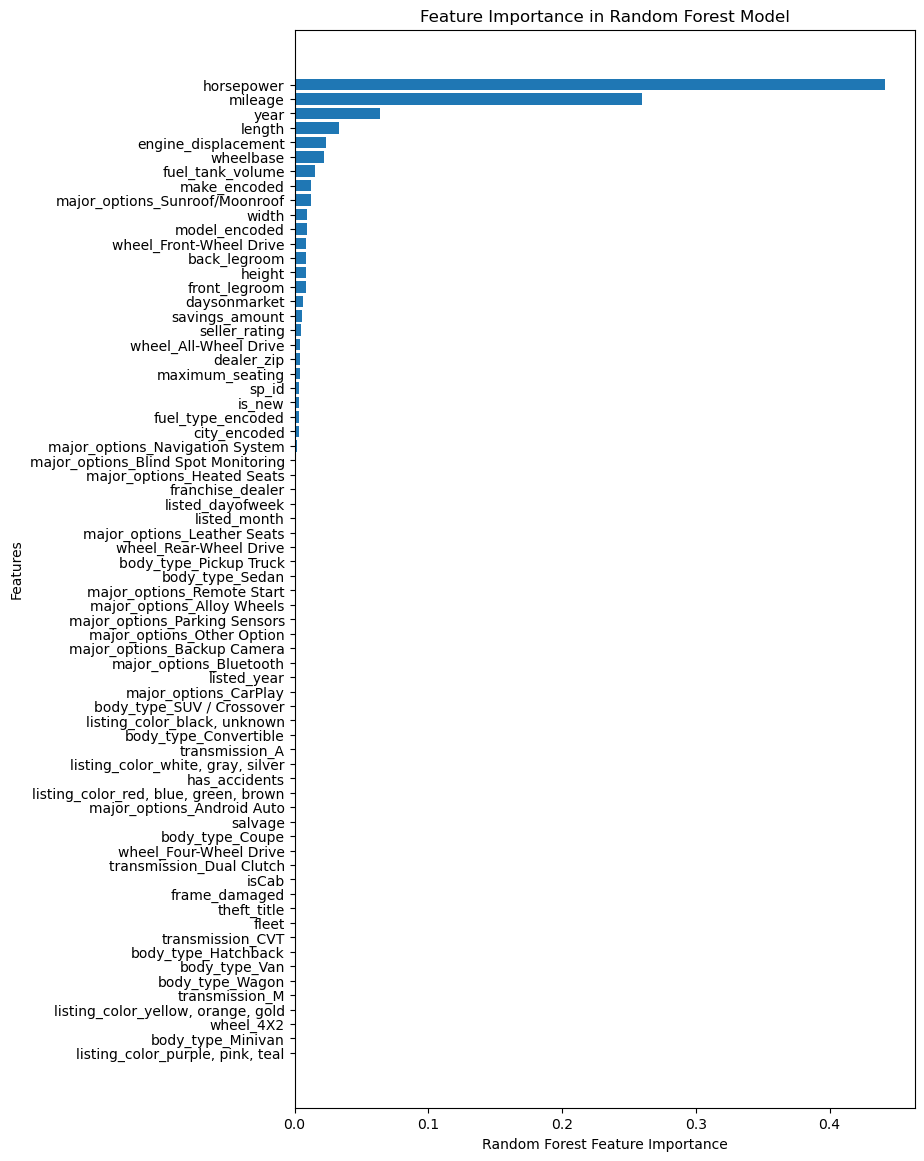

In [75]:
# testataan feature importance rf-mallille

import matplotlib.pyplot as plt
feature_importances = rf_model.feature_importances_
sorted_idx = feature_importances.argsort()
plt.figure(figsize=(8, 14)) 
plt.barh(X_train.columns[sorted_idx], feature_importances[sorted_idx])
plt.xlabel("Random Forest Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance in Random Forest Model")
plt.show()

## Implimentoidaan deep learning mallille skaalaukset ja embedding

In [76]:
import tensorflow as tf

In [77]:
tf_df = final_df.copy()
numerical_cols = [
    "back_legroom", "daysonmarket", "dealer_zip", "engine_displacement",
    "front_legroom", "fuel_tank_volume", "height", "horsepower",
    "length", "maximum_seating", "mileage", "savings_amount",
    "seller_rating", "sp_id", "wheelbase", "width", "year","listed_year"
]

scaler = MinMaxScaler()
tf_df[numerical_cols] = scaler.fit_transform(tf_df[numerical_cols])


In [78]:
# voidaan käyttää label encoded representaatiota, joten näitä ei tarvita nyt
fuel_one_hot_cols = [
    "fuel_type_Biodiesel", "fuel_type_Diesel", "fuel_type_Flex Fuel Vehicle",
    "fuel_type_Gasoline", "fuel_type_Hybrid"
]
tf_df = tf_df.drop(columns=fuel_one_hot_cols)



In [79]:
# pudotetaan object tyyppiset kolumnit
object_cols = tf_df.select_dtypes(include=['object']).columns
tf_df = tf_df.drop(columns=object_cols)
# check
num_object_cols = tf_df.select_dtypes(include=['object']).shape[1]
print(f"Number of columns with dtype 'object': {num_object_cols}")


Number of columns with dtype 'object': 0


In [80]:
print(tf_df.describe())

       back_legroom  daysonmarket    dealer_zip  engine_displacement  \
count  81269.000000  81269.000000  81269.000000         81269.000000   
mean       0.768583      0.036038      0.134809             0.278980   
min        0.000000      0.000000      0.000000             0.000000   
25%        0.730612      0.006977      0.058578             0.175676   
50%        0.775510      0.017674      0.071389             0.243243   
75%        0.804082      0.038140      0.111168             0.378378   
max        1.000000      1.000000      1.000000             1.000000   
std        0.059331      0.049592      0.156842             0.149679   

              fleet  frame_damaged  franchise_dealer  front_legroom  \
count  81269.000000   81269.000000      81269.000000   81269.000000   
mean       0.461960       0.394652          0.734536       0.378129   
min        0.000000       0.000000          0.000000       0.000000   
25%        0.000000       0.000000          0.000000       0.311377

In [81]:
# cyclical encoding tähän paremmin toimittamaan päivät
import numpy as np
import pandas as pd

# Extract components from the listed_date column
tf_df['listed_month'] = tf_df['listed_date'].dt.month
tf_df['listed_dayofweek'] = tf_df['listed_date'].dt.dayofweek

# Apply cyclical encoding
tf_df['month_sin'] = np.sin(2 * np.pi * tf_df['listed_month'] / 12)
tf_df['month_cos'] = np.cos(2 * np.pi * tf_df['listed_month'] / 12)

tf_df['day_sin'] = np.sin(2 * np.pi * tf_df['listed_dayofweek'] / 7)
tf_df['day_cos'] = np.cos(2 * np.pi * tf_df['listed_dayofweek'] / 7)

# Drop the original and intermediate columns
tf_df.drop(columns=['listed_date', 'listed_month', 'listed_dayofweek'], inplace=True)

In [82]:
print(tf_df.describe())

       back_legroom  daysonmarket    dealer_zip  engine_displacement  \
count  81269.000000  81269.000000  81269.000000         81269.000000   
mean       0.768583      0.036038      0.134809             0.278980   
std        0.059331      0.049592      0.156842             0.149679   
min        0.000000      0.000000      0.000000             0.000000   
25%        0.730612      0.006977      0.058578             0.175676   
50%        0.775510      0.017674      0.071389             0.243243   
75%        0.804082      0.038140      0.111168             0.378378   
max        1.000000      1.000000      1.000000             1.000000   

              fleet  frame_damaged  franchise_dealer  front_legroom  \
count  81269.000000   81269.000000      81269.000000   81269.000000   
mean       0.461960       0.394652          0.734536       0.378129   
std        0.498554       0.488779          0.441583       0.085543   
min        0.000000       0.000000          0.000000       0.000000

In [91]:
# Define target and features
target = 'price'
X = tf_df.drop(columns=[target])
y = tf_df[target]

# Split into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [100]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Embedding, Dense, Flatten, Concatenate, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2

# Define embedding dimensions (rule of thumb: min(50, number of unique categories // 2))
embedding_dims = {
    'fuel_type_encoded': (5, 3),   # (unique_categories, embedding_size)
    'make_encoded': (48, 24),
    'city_encoded': (411, 50),
    'model_encoded': (657, 50)
}

# Create inputs and embedding layers
inputs = {}
embeddings = []

for col, (num_categories, embed_size) in embedding_dims.items():
    inp = Input(shape=(1,), name=col)
    emb = Embedding(input_dim=num_categories, output_dim=embed_size, input_length=1)(inp)
    embeddings.append(Flatten()(emb))
    inputs[col] = inp

In [101]:
# Numerical features
numerical_cols = X_train.drop(columns=embedding_dims.keys()).columns
numerical_input = Input(shape=(len(numerical_cols),), name='numerical_inputs')

# Add to inputs
inputs['numerical'] = numerical_input

In [102]:
# Combine embeddings and numerical inputs
all_features = Concatenate()([*embeddings, numerical_input])

In [106]:
# Add dense layers
#x = Dense(128, activation='relu')(all_features)
x = Dense(128, activation='relu')(all_features)
x = Dense(64, activation='relu')(x)
x = Dense(32, activation='relu')(x)

# Output layer (predicting price)
output = Dense(1, activation='linear', name='output')(x)

# Build and compile model
model = Model(inputs=list(inputs.values()), outputs=output)
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Print model summary
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 fuel_type_encoded (InputLayer)  [(None, 1)]         0           []                               
                                                                                                  
 make_encoded (InputLayer)      [(None, 1)]          0           []                               
                                                                                                  
 city_encoded (InputLayer)      [(None, 1)]          0           []                               
                                                                                                  
 model_encoded (InputLayer)     [(None, 1)]          0           []                               
                                                                                            

In [107]:
# Prepare input dictionaries for TensorFlow
train_inputs = {col: X_train[col] for col in embedding_dims.keys()}
train_inputs['numerical_inputs'] = X_train[numerical_cols].values  # Correct key name

test_inputs = {col: X_test[col] for col in embedding_dims.keys()}
test_inputs['numerical_inputs'] = X_test[numerical_cols].values  # Correct key name


In [108]:
# Train the model

history = model.fit(
    train_inputs,
    y_train,
    validation_data=(test_inputs, y_test),
    epochs=40,
    batch_size=64
)

# Evaluate the model
loss, mae = model.evaluate(test_inputs, y_test)
print(f"Test Loss: {loss}, Test MAE: {mae}")

Epoch 1/40
1016/1016 [==============================] - 3s 2ms/step - loss: 232632736.0000 - mae: 9139.5908 - val_loss: 64558676.0000 - val_mae: 5182.8198
Epoch 2/40
1016/1016 [==============================] - 2s 2ms/step - loss: 55980908.0000 - mae: 4586.4775 - val_loss: 45297028.0000 - val_mae: 4253.1694
Epoch 3/40
1016/1016 [==============================] - 2s 2ms/step - loss: 41499956.0000 - mae: 3917.8999 - val_loss: 35774644.0000 - val_mae: 3832.2339
Epoch 4/40
1016/1016 [==============================] - 2s 2ms/step - loss: 34302900.0000 - mae: 3562.1475 - val_loss: 31517122.0000 - val_mae: 3601.9282
Epoch 5/40
1016/1016 [==============================] - 2s 2ms/step - loss: 29929548.0000 - mae: 3297.9004 - val_loss: 27719430.0000 - val_mae: 3282.3921
Epoch 6/40
1016/1016 [==============================] - 2s 2ms/step - loss: 26528434.0000 - mae: 3061.7603 - val_loss: 25073350.0000 - val_mae: 3064.8245
Epoch 7/40
1016/1016 [==============================] - 2s 2ms/step - loss:

Okei eli, mallin ennustavat hinnat olivat noin 1800-2000 dollaria pielessä.
testattu myös 50 epoch, parantaa hieman

21.11.2024 klo 22.32: Mielestäni jää enää siis:

1. major_options <- sarakkeen käsittely (en ehtinyt yhtään paneutua tai miettiä mitenkä tämän kanssa) Oli kuitenkin yhtenä vaatimusmäärittelyn/asiakkaan kysymyksenä, miten lisäominaisuudet vaikuttavat haluttavuuteen

2. mahd. mietintä tehdäänkö "new features" eli tarviiko jotain lisätä? <- tätä joudetaa miettimään kun päästää eteenpäin
3. visualisaatio <- #Pekkatekeesunnuntaina ja saa muutkin tehdä ´:)
4. skaalaus
5. luokkamuuttujat?

## Phase 3 guide (Data Preparation)

* Select data
* Clean the data
* Integrate data
* Format data
* Construct the data

## Additional questions:

* Handling of missing values
* Handling of outliers
* Remove "unnecessary features"
* Add "new features"
* Also visualize after preprocessing
* Perform data scaling
* Classification class variable?

Important: The result data from this phase should have good quality for the next step, i.e. modeling.